<b>Case 4 - Millennium BCP
<br>Group H

<br>| Ana Teresa Maia | r20201562 |
<br>| Henrique Falcão | r20201519 |
<br>| Maria Benedita Elias | 20230491 |
<br>| Maria Leonor Gusmão | 20230488 |
<br>| Pedro  Carvalho | 20230487 |


<br>Business Cases for Data Science S2 2023/2024

<a name="top"></a> 
# Project Main Contents


* [Import needed libraires + Initial Setup](#libraries)
* [Dataset loading and Convert to Right Format](#load)
* [Importing Q1](#Q1)
   * [Dealing with Missing Values of Q1](#Q1na)
* [Importing Q2](#Q2)
* [Importing Q3](#Q3)
   * [Transpose of IdField and Value for Q3](#Q3idva)
* [Importing Q4](#Q4)
   * [Code for multiple reasons of rejections](#rej)
* [Check Final Data Types (All dfs)](#cdt)
* [New Variables (All dfs)](#nv)
* [Merge Data (All dfs)](#mg)
* [Final Check of Data Types and Missing Data (Merged Data)](#nm)
* [Target Column](#tg)
* [Drop of Incomplete Processes](#drop)
* [Visualizations](#vi)
* [Exploration of Inconsistencies](#inc)
* [Check Outliers](#out)
* ['Robots' cases in User Infromation](#rob)
* [Feature Drops](#fdrop)
* [Final Descriptive Statistics](#desc)
* [Basket Division](#bas)

<a class="anchor" id="libraries">

### Import needed libraries + Initial Setup
###### [Go back to Contents](#top)
</a>

In [158]:
#general imports
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.pyplot as plt
import math

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Setting seaborn style
sns.set()

#To avoid too many warnings in graphs
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


In [159]:
colors = {     "magenta": "#E20074",     "dark_gray": "#333333",     "light_gray": "#F2F2F2" }

<a class="anchor" id="load">

## Dataset loading and Convert to Right Format
###### [Go back to Contents](#top)
</a>

At this phase we are going to import all the data frames provided by yours and we will evaluate which initial transformations need to be made


<a class="anchor" id="Q1">

## Importing Q1
###### [Go back to Contents](#top)
</a>


In [161]:
#Importing Task execution data 
data_sheet1 = pd.read_excel('./Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name ='Q1 - Task execution data')
data_sheet1

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,Submit initial request,270
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322.0,1104.0,Execution,NaN,273
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606.0,NaN,Execution,NaN,273
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638.0,569.0,Execution,Task executed with success,282
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638.0,569.0,Final task,Request accepted by requester,299
...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606.0,1147.0,Execution,NaN,273
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606.0,1147.0,Execution,NaN,300
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243.0,722.0,Execution,Task returned to team,290
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92.0,722.0,Execution,Task executed with success,282


In [162]:
data_sheet1.describe()

,Task Id,Request Identifier,Actvity ID,Task Executer,Task executer department,idBPMApplicationAction
count,2.090170e+05,209017.000000,209017.000000,188888.000000,181887.000000,209017.000000
mean,3.399026e+06,23375.794390,102.762110,6664.555191,760.573559,1154.244157
std,1.232948e+06,13487.308735,2.115501,3781.848219,379.111798,2508.436401
min,1.584303e+06,1.000000,100.000000,1.000000,5.000000,270.000000
25%,2.337169e+06,11670.000000,102.000000,4322.000000,511.000000,273.000000
50%,3.200924e+06,23325.000000,102.000000,7818.000000,693.000000,282.000000
75%,4.154313e+06,35564.000000,104.000000,10606.000000,1146.000000,300.000000
max,6.863412e+06,45772.000000,108.000000,11365.000000,1336.000000,8888.000000


In [163]:
data_sheet1.nunique()

Task Id                     209017
Request Identifier           45772
Task arrival date           208936
Task capture date           202364
Task execution end date     189229
Task predicted end date     148867
Actvity ID                       9
Task Executer                 1648
Task executer department       391
Task Type                        4
Action                           6
idBPMApplicationAction          19
dtype: int64

In [164]:
data_sheet1.info() # 4 variables have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Task Id                   209017 non-null  int64  
 1   Request Identifier        209017 non-null  int64  
 2   Task arrival date         209017 non-null  object 
 3   Task capture date         209017 non-null  object 
 4   Task execution end date   209017 non-null  object 
 5   Task predicted end date   163232 non-null  object 
 6   Actvity ID                209017 non-null  int64  
 7   Task Executer             188888 non-null  float64
 8   Task executer department  181887 non-null  float64
 9   Task Type                 209017 non-null  object 
 10  Action                    124576 non-null  object 
 11  idBPMApplicationAction    209017 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 19.1+ MB


In [165]:
# Calculate the total number of rows
total_rows = data_sheet1.shape[0]

# Calculate the number of missing values in each column
missing_values_count = data_sheet1.isnull().sum()

# Calculate the percentage of missing values in each column
missing_values_percentage = (missing_values_count / total_rows) * 100
missing_values_percentage #Is action important?
#We already know that predicted date is ok to have missings associated with activity ID 100

Task Id                      0.000000
Request Identifier           0.000000
Task arrival date            0.000000
Task capture date            0.000000
Task execution end date      0.000000
Task predicted end date     21.904917
Actvity ID                   0.000000
Task Executer                9.630317
Task executer department    12.979805
Task Type                    0.000000
Action                      40.399106
idBPMApplicationAction       0.000000
dtype: float64


<a class="anchor" id="Q1na">

## Dealing with Missing Values of Q1
###### [Go back to Contents](#top)
</a>



After an initial understanding of Q1 data set we identify the pressence of some missing values, for consistency purposes we ended up filling all the missing data with a new category 'Non identifiable'. Note that we also check all the data types of the variables that need these transformations.

In [166]:
#Changing data types before the transformations

In [167]:
data_sheet1['Task Executer'] = data_sheet1['Task Executer'].fillna(0).astype(int)

In [168]:
data_sheet1['Task executer department'] = data_sheet1['Task executer department'].fillna(0).astype(int)

In [169]:
#We will fill the missing values of the following columns with 'Non identifiable' category for consistency purposes

#Convert 'Task Executer' column to string type
data_sheet1['Task Executer'] = data_sheet1['Task Executer'].astype(str)
#Replace '0' values with 'Non identifiable'
data_sheet1['Task Executer'] = data_sheet1['Task Executer'].replace('0', 'Non identifiable')

#Convert 'Task executer department' column to string type
data_sheet1['Task executer department'] = data_sheet1['Task executer department'].astype(str)
#Replace '0' values with 'Non identifiable'
data_sheet1['Task executer department'] = data_sheet1['Task executer department'].replace('0', 'Non identifiable')

#Action is already converted into string
data_sheet1['Action'] = data_sheet1['Action'].fillna('Non identifiable')

#Printing the DataFrame to verify the changes
data_sheet1


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638,569,Initial Request,Submit initial request,270
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299
...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,Non identifiable,273
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,Non identifiable,300
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,Task returned to team,290
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,Task executed with success,282


The columns where we inputed Non Identifiable match the % of missing values, therefore we know we did not lose any more information

In [170]:
# Calculate the percentage of 'Non identifiable' in each specified column
columns_to_check = ['Task Executer', 'Task executer department', 'Action']

percentages = {}

for column in columns_to_check:
    non_identifiable_count = data_sheet1[column].value_counts().get('Non identifiable', 0)
    total_count = data_sheet1[column].shape[0]
    percentage = (non_identifiable_count / total_count) * 100
    percentages[column] = percentage

# Print the percentages
for column, percentage in percentages.items():
    print(f"Percentage of 'Non identifiable' in {column}: {percentage:.2f}%")


Percentage of 'Non identifiable' in Task Executer: 9.63%
Percentage of 'Non identifiable' in Task executer department: 12.98%
Percentage of 'Non identifiable' in Action: 40.40%



<a class="anchor" id="Q2">

## Importing Q2
###### [Go back to Contents](#top)
</a>


Importing user information

In [171]:
#Importing Q2 - User information data
data_sheet2 = pd.read_excel('./Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name ='Q2 - User information')
data_sheet2

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1872,F,1988,1,Yes,2024,N
1,11133,F,1975,1,Yes,2019,N
2,10332,F,1978,2,Yes,2019,N
3,10349,F,1976,3,Yes,2024,N
4,1394,F,1984,4,Yes,2021,N
...,...,...,...,...,...,...,...
11365,3641,M,1968,21,No,2020,Y
11366,448,F,1974,5,Yes,2024,N
11367,9088,M,1971,5,Yes,2022,N
11368,2353,F,2000,22,Yes,2023,N


In [172]:
data_sheet2.describe() 

,Task Executer,BirthYear,Role ID,OrgUnitSince
count,11370.000000,11370.000000,11370.000000,11370.000000
mean,5685.483201,1976.007476,17.669745,2020.246174
std,3282.386103,15.476745,14.767423,4.393640
min,1.000000,1901.000000,1.000000,1966.000000
25%,2843.250000,1967.000000,8.000000,2018.000000
50%,5685.500000,1975.000000,21.000000,2022.000000
75%,8527.750000,1987.000000,21.000000,2023.000000
max,11370.000000,2050.000000,123.000000,2024.000000


We noticed that there are incoherences in the birth year, example: it's not likely that someone lives to be 123 years old or that a task is executed by someone that is under 18 or has not been born yet (max value: 2050)

There are no missing values in this sheet!

In [173]:
# Select categorical columns
categorical_columns = ['Task Executer', 'Sex', 'Role ID', 'Is Manager', 'IsOutSourcer']

# Perform descriptive statistics for categorical columns
categorical_stats = {}
for column in categorical_columns:
    categorical_stats[column] = data_sheet2[column].value_counts()

# Print the descriptive statistics
for column, stats in categorical_stats.items():
    print(f"Descriptive statistics for column '{column}':")
    print(stats)
    print()

Descriptive statistics for column 'Task Executer':
Task Executer
1526     6
7457     6
7779     6
1427     6
1135     6
        ..
932      1
10606    1
8650     1
8172     1
1257     1
Name: count, Length: 11274, dtype: int64

Descriptive statistics for column 'Sex':
Sex
M    6048
F    4763
      442
U     117
Name: count, dtype: int64

Descriptive statistics for column 'Role ID':
Role ID
21     4080
5       874
10      635
3       537
9       527
       ... 
93        1
92        1
77        1
84        1
123       1
Name: count, Length: 123, dtype: int64

Descriptive statistics for column 'Is Manager':
Is Manager
Yes    7290
No     4080
Name: count, dtype: int64

Descriptive statistics for column 'IsOutSourcer':
IsOutSourcer
N    7290
Y    4080
Name: count, dtype: int64



We noticed that in the column "Sex" there are 442 instances where the value is empty, according to what the Millenium team mentioned they're considered machines. The treatment of this values will be evaluated in the future.


<a class="anchor" id="Q3">

## Importing Q3
###### [Go back to Contents](#top)
</a>


In [174]:
#Importing Q3 - User information data
data_sheet3 = pd.read_excel('./Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name ='Q3 - Specific request data')
data_sheet3

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0
...,...,...,...
297551,1604,1995,90
297552,1604,2010,90
297553,1604,2280,90
297554,1604,2227,90


In [175]:
data_sheet3.info() #there are no missing values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297556 entries, 0 to 297555
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idField             297556 non-null  int64 
 1   Request Identifier  297556 non-null  int64 
 2   Value               297556 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [176]:
data_sheet3.describe(include='all')

,idField,Request Identifier,Value
count,297556.000000,297556.000000,297556.0
unique,NaN,NaN,752.0
top,NaN,NaN,10.0
freq,NaN,NaN,85761.0
mean,2800.050737,22818.646319,NaN
std,1273.371432,13384.965985,NaN
min,47.000000,1.000000,NaN
25%,3388.000000,11094.000000,NaN
50%,3391.000000,22738.000000,NaN
75%,3486.000000,34605.000000,NaN



<a class="anchor" id="Q3idva">

## Transpose of IdField and Value for Q3
###### [Go back to Contents](#top)
</a>

Id field and request identifier are identifier columns, however from this we gather that there are 752 unique values in the "Value" column so some might be repeated. Besides that we also know that there are many values for only 1 specific request identifier.

The final approach of these transformations was to gatter some valuable information from this data frame.


In [177]:
 #Count the number of unique values in each column
unique_counts = data_sheet3.nunique()

# Print the unique counts
print(unique_counts)

idField                  11
Request Identifier    45772
Value                   752
dtype: int64


In [178]:
# Count the occurrences of each unique value in the 'Value' column
value_counts = data_sheet3['Value'].value_counts()

# Print the counts
value_counts.head(15)

Value
10     85761
50     35153
30     28320
70     22450
20     20092
100    19520
60     12935
2       7988
40      6075
1       4681
80      4081
90      3579
5        353
0        246
-1       209
Name: count, dtype: int64

In [179]:
data_sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297556 entries, 0 to 297555
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idField             297556 non-null  int64 
 1   Request Identifier  297556 non-null  int64 
 2   Value               297556 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [180]:
#Group by 'Request Identifier' and aggregate 'Value' into a list
grouped_df = data_sheet3.groupby('Request Identifier')['Value'].apply(list).reset_index()

#Printing the new DataFrame
grouped_df


,Request Identifier,Value
0,1,"[1, 1, 10, 10, 10, 10, 20, 2022-04-10T23:00:00..."
1,2,"[10, 10, 10, 10, 10, 20, 2022-04-11T23:00:00.0..."
2,3,"[10, 10, 2022-04-11T23:00:00.000Z, 30, 30]"
3,4,"[10, 10, 10, 20, 2022-04-12T23:00:00.000Z]"
4,5,"[10, 10, 20, 20, 2022-04-05T23:00:00.000Z, 30,..."
...,...,...
45767,45768,"[10, 10, 2024-03-31T23:00:00.000Z, 50, 50, 70]"
45768,45769,"[10, 100, 2024-03-31T23:00:00.000Z, 50, 50, 70]"
45769,45770,"[10, 100, 2, 2, 2024-03-31T23:00:00.000Z, 30, ..."
45770,45771,"[1, 1, 20, 2024-04-11T23:00:00.000Z, 30, 30, 5..."


In [181]:
grouped_df['Value Count'] = grouped_df['Value'].apply(len)
grouped_df

,Request Identifier,Value,Value Count
0,1,"[1, 1, 10, 10, 10, 10, 20, 2022-04-10T23:00:00...",9
1,2,"[10, 10, 10, 10, 10, 20, 2022-04-11T23:00:00.0...",7
2,3,"[10, 10, 2022-04-11T23:00:00.000Z, 30, 30]",5
3,4,"[10, 10, 10, 20, 2022-04-12T23:00:00.000Z]",5
4,5,"[10, 10, 20, 20, 2022-04-05T23:00:00.000Z, 30,...",7
...,...,...,...
45767,45768,"[10, 10, 2024-03-31T23:00:00.000Z, 50, 50, 70]",6
45768,45769,"[10, 100, 2024-03-31T23:00:00.000Z, 50, 50, 70]",6
45769,45770,"[10, 100, 2, 2, 2024-03-31T23:00:00.000Z, 30, ...",9
45770,45771,"[1, 1, 20, 2024-04-11T23:00:00.000Z, 30, 30, 5...",9


In [182]:
# Count the occurrences of each unique value in the 'Value' column
value_counts = data_sheet3['idField'].value_counts()

# Print the counts
print("Unique value counts for 'idField' column:")
print(value_counts)

Unique value counts for 'idField' column:
idField
3388    45772
3486    45772
203     45772
3391    44476
3390    37521
3491    29883
3420    14651
3935    14287
47       6781
1602     6521
1604     6120
Name: count, dtype: int64


In [183]:
# Check for repeated idField within each Request Identifier
repeated_idFields = data_sheet3[data_sheet3.duplicated(subset=['Request Identifier', 'idField'], keep=False)]

# Print the rows with repeated idField
repeated_idFields


,idField,Request Identifier,Value


This means that by request identifier there are no idFields duplicated , so when we transpose them into columns these will be binary variables

In [184]:
# List of idFields
idFields = [203, 3486, 3388, 3391, 3390, 3491, 3420, 3935, 47, 1602, 1604]

# Assuming data_sheet3 is your DataFrame
# Create new binary columns for each specified idField
for idField in idFields:
    column_name = f'idField_{idField}'
    data_sheet3[column_name] = data_sheet3['idField'].apply(lambda x: 1 if x == idField else 0)

# Group by 'Request Identifier' and aggregate the new binary columns
# First, select only the 'Request Identifier' and new binary columns
binary_columns = [f'idField_{idField}' for idField in idFields]
grouped_df2 = data_sheet3[['Request Identifier'] + binary_columns].groupby('Request Identifier').sum().reset_index()

grouped_df2

,Request Identifier,idField_203,idField_3486,idField_3388,idField_3391,idField_3390,idField_3491,idField_3420,idField_3935,idField_47,idField_1602,idField_1604
0,1,1,1,1,1,0,1,1,0,1,1,1
1,2,1,1,1,1,1,1,1,0,0,0,0
2,3,1,1,1,0,1,0,1,0,0,0,0
3,4,1,1,1,0,1,0,1,0,0,0,0
4,5,1,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,1,1,1,1,1,1,0,0,0,0,0
45768,45769,1,1,1,1,1,1,0,0,0,0,0
45769,45770,1,1,1,1,1,0,0,1,1,1,1
45770,45771,1,1,1,1,1,0,0,1,1,1,1


In [185]:
# List of the 12 most common values
common_values = [10, 50, 30, 70, 20, 100, 60, 2, 40, 1, 80, 90]

# Assuming data_sheet3 is your DataFrame
# Create new columns for each common value
for value in common_values:
    column_name = f'Value_{value}'
    data_sheet3[column_name] = data_sheet3['Value'].apply(lambda x: 1 if x == value else 0)

# Group by 'Request Identifier' and sum only the new binary columns
# First, select only the 'Request Identifier' and new binary columns
binary_columns = [f'Value_{value}' for value in common_values]
grouped_df3 = data_sheet3[['Request Identifier'] + binary_columns].groupby('Request Identifier').sum().reset_index()

# Print the new DataFrame
grouped_df3

,Request Identifier,Value_10,Value_50,Value_30,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90
0,1,4,0,0,0,1,0,0,0,0,2,0,1
1,2,5,0,0,0,1,0,0,0,0,0,0,0
2,3,2,0,2,0,0,0,0,0,0,0,0,0
3,4,3,0,0,0,1,0,0,0,0,0,0,0
4,5,2,0,2,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,2,2,0,1,0,0,0,0,0,0,0,0
45768,45769,1,2,0,1,0,1,0,0,0,0,0,0
45769,45770,1,1,1,0,0,1,1,2,1,0,0,0
45770,45771,0,1,2,0,1,0,1,0,0,2,0,1


In [186]:
# Merge grouped_df and grouped_df2 on 'Request Identifier'
merged_df = pd.merge(grouped_df, grouped_df2, on='Request Identifier')

# Merge the result with grouped_df3 on 'Request Identifier'
final_merged_df = pd.merge(merged_df, grouped_df3, on='Request Identifier')

# Print the final merged DataFrame
final_merged_df

,Request Identifier,Value,Value Count,idField_203,idField_3486,idField_3388,idField_3391,idField_3390,idField_3491,idField_3420,...,Value_30,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90
0,1,"[1, 1, 10, 10, 10, 10, 20, 2022-04-10T23:00:00...",9,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,2,0,1
1,2,"[10, 10, 10, 10, 10, 20, 2022-04-11T23:00:00.0...",7,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,3,"[10, 10, 2022-04-11T23:00:00.000Z, 30, 30]",5,1,1,1,0,1,0,1,...,2,0,0,0,0,0,0,0,0,0
3,4,"[10, 10, 10, 20, 2022-04-12T23:00:00.000Z]",5,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,5,"[10, 10, 20, 20, 2022-04-05T23:00:00.000Z, 30,...",7,1,1,1,1,1,1,1,...,2,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,"[10, 10, 2024-03-31T23:00:00.000Z, 50, 50, 70]",6,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
45768,45769,"[10, 100, 2024-03-31T23:00:00.000Z, 50, 50, 70]",6,1,1,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
45769,45770,"[10, 100, 2, 2, 2024-03-31T23:00:00.000Z, 30, ...",9,1,1,1,1,1,0,0,...,1,0,0,1,1,2,1,0,0,0
45770,45771,"[1, 1, 20, 2024-04-11T23:00:00.000Z, 30, 30, 5...",9,1,1,1,1,1,0,0,...,2,0,1,0,1,0,0,2,0,1


In [187]:
# Dropping the 'idField' column with inplace=True
final_merged_df.drop(columns='idField', inplace=True, errors='ignore')

In [188]:
data_sheet3 = final_merged_df

The information extracted from this dataset is crucial to predict at activity 100 since it is one of the few information we can know at the moment the request arrives.


<a class="anchor" id="Q4">

## Importing Q4
###### [Go back to Contents](#top)
</a>


This data frame give us information regarding the task ids rejected and the corresponding code associated with some sort of rejection motive.

In [189]:
#Importing Q4 - Rejections data
data_sheet4 = pd.read_excel('./Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name ='Q4 - Rejections')
data_sheet4

,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183
...,...,...
4094,6622014,183
4095,6626674,183
4096,6628563,183
4097,6636694,183


In [190]:
data_sheet4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Task Id           4099 non-null   int64
 1   idBPMRequirement  4099 non-null   int64
dtypes: int64(2)
memory usage: 64.2 KB



<a class="anchor" id="rej">

## Code for multiple reasons of rejections
###### [Go back to Contents](#top)
</a>


To avoid problems whem merging this data frame with Q1 we will create a new idBPMRequirement code to identify any task ids that have multiple codes associated (multiple motives of rejections), in this way we ensure that no task ids are duplicated in this data frame.

In [191]:
# Group the DataFrame by 'Task Id' and count the number of unique 'idBPMRequirement' values for each Task ID
task_id_requirements_count = data_sheet4.groupby('Task Id')['idBPMRequirement'].nunique()

# Filter Task IDs with more than one idBPMRequirement associated
task_ids_with_multiple_requirements = task_id_requirements_count[task_id_requirements_count > 1]

# Group the DataFrame by 'Task Id' and check for multiple unique 'idBPMRequirement' values
for task_id, group in data_sheet4.groupby('Task Id'):
    unique_requirements = group['idBPMRequirement'].unique()
    if len(unique_requirements) > 1:
        data_sheet4.loc[data_sheet4['Task Id'] == task_id, 'idBPMRequirement'] = 101

data_sheet4

#This code '101' was created to identify the task ids which have multiple rejection reasons associated

,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183
...,...,...
4094,6622014,183
4095,6626674,183
4096,6628563,183
4097,6636694,183


In [192]:
# Check for duplicates in the 'Task Id' column
duplicates = data_sheet4[data_sheet4.duplicated(subset='Task Id', keep=False)]

# Print the rows with duplicated 'Task Id'
print("Rows with duplicated Task Id:")
duplicates

Rows with duplicated Task Id:


,Task Id,idBPMRequirement
8,1647860,101
9,1647860,101
10,1647860,101
11,1647860,101
12,1647860,101
...,...,...
4081,6614200,101
4084,6615839,101
4085,6615839,101
4086,6616457,101


Remove duplicates based on the 'Task Id' column, as we only want one line with the code that representes multiple reasons of rejections

In [193]:

data_sheet4 = data_sheet4.drop_duplicates(subset='Task Id', keep='first')

In [194]:
data_sheet4

,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183
...,...,...
4094,6622014,183
4095,6626674,183
4096,6628563,183
4097,6636694,183



<a class="anchor" id="cdt">

## Check Data Types
###### [Go back to Contents](#top)
</a>


This section ensures that any of the data types is correct before entering into the merging phase

## Q1

In [195]:
#Change dates to datetime so that we can do calculations

data_sheet1['Task arrival date'] = pd.to_datetime(data_sheet1['Task arrival date'])
data_sheet1['Task capture date'] = pd.to_datetime(data_sheet1['Task capture date'])
data_sheet1['Task execution end date'] = pd.to_datetime(data_sheet1['Task execution end date'])
data_sheet1['Task predicted end date'] = pd.to_datetime(data_sheet1['Task predicted end date'])

In [196]:
#Changing other data types
data_sheet1['Task Id'] = data_sheet1['Task Id'].astype(str)
data_sheet1['Request Identifier'] = data_sheet1['Request Identifier'].astype(str)
data_sheet1['Actvity ID'] = data_sheet1['Actvity ID'].astype(str)
data_sheet1['idBPMApplicationAction'] = data_sheet1['idBPMApplicationAction'].astype(str)

In [197]:
data_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Task Id                   209017 non-null  object        
 1   Request Identifier        209017 non-null  object        
 2   Task arrival date         209017 non-null  datetime64[ns]
 3   Task capture date         209017 non-null  datetime64[ns]
 4   Task execution end date   209017 non-null  datetime64[ns]
 5   Task predicted end date   163232 non-null  datetime64[ns]
 6   Actvity ID                209017 non-null  object        
 7   Task Executer             209017 non-null  object        
 8   Task executer department  209017 non-null  object        
 9   Task Type                 209017 non-null  object        
 10  Action                    209017 non-null  object        
 11  idBPMApplicationAction    209017 non-null  object        
dtypes:

## Q2

In [198]:
# Change the data type of the 'Role ID' column to str 
data_sheet2['Role ID'] = data_sheet2['Role ID'].astype(str)
data_sheet2['Task Executer'] = data_sheet2['Task Executer'].astype(str)

In [199]:
data_sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Task Executer  11370 non-null  object
 1   Sex            11370 non-null  object
 2   BirthYear      11370 non-null  int64 
 3   Role ID        11370 non-null  object
 4   Is Manager     11370 non-null  object
 5   OrgUnitSince   11370 non-null  int64 
 6   IsOutSourcer   11370 non-null  object
dtypes: int64(2), object(5)
memory usage: 621.9+ KB


## Q3

In [200]:
data_sheet3['Request Identifier'] = data_sheet3['Request Identifier'].astype(str)

In [201]:
data_sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45772 entries, 0 to 45771
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Request Identifier  45772 non-null  object
 1   Value               45772 non-null  object
 2   Value Count         45772 non-null  int64 
 3   idField_203         45772 non-null  int64 
 4   idField_3486        45772 non-null  int64 
 5   idField_3388        45772 non-null  int64 
 6   idField_3391        45772 non-null  int64 
 7   idField_3390        45772 non-null  int64 
 8   idField_3491        45772 non-null  int64 
 9   idField_3420        45772 non-null  int64 
 10  idField_3935        45772 non-null  int64 
 11  idField_47          45772 non-null  int64 
 12  idField_1602        45772 non-null  int64 
 13  idField_1604        45772 non-null  int64 
 14  Value_10            45772 non-null  int64 
 15  Value_50            45772 non-null  int64 
 16  Value_30            45

## Q4

In [202]:
data_sheet4['Task Id'] = data_sheet4['Task Id'].astype(str)
data_sheet4['idBPMRequirement'] = data_sheet4['idBPMRequirement'].astype(str)

In [203]:
data_sheet4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4056 entries, 0 to 4098
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Id           4056 non-null   object
 1   idBPMRequirement  4056 non-null   object
dtypes: object(2)
memory usage: 95.1+ KB



<a class="anchor" id="nv">

## New Variables (All dfs)
###### [Go back to Contents](#top)
</a>


This section is focused on the creation of new variables regarding the existent ones, aiming to generate more value from the resources that you gave to us. At the end of the section is possible to see a final description of all the variables created.

In [204]:
#Var 1 - Period between arrival and execution per line IN HOURS
#Calculate the period in hours
data_sheet1['Period between arrival and execution'] = (data_sheet1['Task execution end date'] - data_sheet1['Task arrival date']).dt.total_seconds() / 3600
#Convert the column to integer type
data_sheet1['Period between arrival and execution'] = data_sheet1['Period between arrival and execution'].astype(int)
 
#Display the first 30 rows to verify
data_sheet1.head(30)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,0
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273,18
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273,0
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282,675
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299,0
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,0
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,Non identifiable,273,1
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,Non identifiable,273,1
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,Task executed with success,282,0
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,Request accepted by requester,299,0


In [205]:
#Var 2 Arrival capture time per line IN HOURS
# Calculate the period in hours
data_sheet1['Period between arrival and capture'] = (data_sheet1['Task capture date'] - data_sheet1['Task arrival date']).dt.total_seconds() / 3600
# Convert the column to integer type
data_sheet1['Period between arrival and capture'] = data_sheet1['Period between arrival and capture'].astype(int)
 
# Convert the column to integer type
data_sheet1['Period between arrival and capture'] = data_sheet1['Period between arrival and capture'].astype(int)

In [206]:
data_sheet1.head(40)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution,Period between arrival and capture
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,0,0
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273,18,17
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273,0,0
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282,675,0
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299,0,0
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,0,0
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,Non identifiable,273,1,0
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,Non identifiable,273,1,1
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,Task executed with success,282,0,0
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,Request accepted by requester,299,0,0


In [207]:
data_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               209017 non-null  object        
 1   Request Identifier                    209017 non-null  object        
 2   Task arrival date                     209017 non-null  datetime64[ns]
 3   Task capture date                     209017 non-null  datetime64[ns]
 4   Task execution end date               209017 non-null  datetime64[ns]
 5   Task predicted end date               163232 non-null  datetime64[ns]
 6   Actvity ID                            209017 non-null  object        
 7   Task Executer                         209017 non-null  object        
 8   Task executer department              209017 non-null  object        
 9   Task Type                             209017 non-null  obje

In [208]:
#Var 3 - Total Length of each process- this variable will be useful for analyzing what could be potential outliers ta this time

In [209]:
# Group by 'Request Identifier' and count the number of rows in each group
length_of_process = data_sheet1.groupby('Request Identifier').size()

# Create a new column to store the length of the process for each request ID
data_sheet1['Length of the Process'] = data_sheet1['Request Identifier'].map(length_of_process)


data_sheet1.head(30)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution,Period between arrival and capture,Length of the Process
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,0,0,5
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273,18,17,5
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273,0,0,5
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282,675,0,5
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299,0,0,5
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,0,0,5
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,Non identifiable,273,1,0,5
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,Non identifiable,273,1,1,5
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,Task executed with success,282,0,0,5
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,Request accepted by requester,299,0,0,5


In [210]:
#Var 3.1 - cumulative lenght of the process

In [211]:
# Group by 'Request Identifier' and use cumcount to calculate the cumulative length of process
data_sheet1['Cumulative Length of Process'] = data_sheet1.groupby('Request Identifier').cumcount() + 1

# Print the updated DataFrame
data_sheet1.head(30)



,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution,Period between arrival and capture,Length of the Process,Cumulative Length of Process
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,0,0,5,1
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273,18,17,5,2
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273,0,0,5,3
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282,675,0,5,4
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299,0,0,5,5
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,0,0,5,1
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,Non identifiable,273,1,0,5,2
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,Non identifiable,273,1,1,5,3
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,Task executed with success,282,0,0,5,4
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,Request accepted by requester,299,0,0,5,5


In [212]:
#Var 4 - Years in Org position- Extracting value from date variables is helpful to have a quantifiable measure

# Convert 'OrgUnitSince' to datetime
data_sheet2['OrgUnitSince'] = pd.to_datetime(data_sheet2['OrgUnitSince'], format='%Y')

# Get the current year
current_year = pd.Timestamp('now').year

# Calculate the period in years since each task executer has been in the same organization position
data_sheet2['Years in Org Position'] = current_year - data_sheet2['OrgUnitSince'].dt.year
data_sheet2

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Years in Org Position
0,1872,F,1988,1,Yes,2024-01-01,N,0
1,11133,F,1975,1,Yes,2019-01-01,N,5
2,10332,F,1978,2,Yes,2019-01-01,N,5
3,10349,F,1976,3,Yes,2024-01-01,N,0
4,1394,F,1984,4,Yes,2021-01-01,N,3
...,...,...,...,...,...,...,...,...
11365,3641,M,1968,21,No,2020-01-01,Y,4
11366,448,F,1974,5,Yes,2024-01-01,N,0
11367,9088,M,1971,5,Yes,2022-01-01,N,2
11368,2353,F,2000,22,Yes,2023-01-01,N,1


In [213]:
#Var 5 - What Tasks IDS were rejected(1) or not(0)?

# Extract the 'Task Id' values from data_sheet3
task_ids_data_sheet4 = data_sheet4['Task Id']

# Create a new binary variable in data_sheet1 indicating whether the 'Task Id' is present in data_sheet3, meaning that they were rejected as they have a motive for rejections
data_sheet1['Rejections'] = data_sheet1['Task Id'].isin(task_ids_data_sheet4).astype(int)

In [214]:
distinct_values_count = data_sheet1['Rejections'].value_counts()

In [215]:
distinct_values_count

Rejections
0    205471
1      3546
Name: count, dtype: int64

In [216]:
task_id_1606251 = data_sheet1[data_sheet1['Task Id'] == "1606251"]
task_id_1606251 #we confirmed that is in rejections which makes sense

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution,Period between arrival and capture,Length of the Process,Cumulative Length of Process,Rejections
14,1606251,4,2022-04-20 15:02:55.713,2022-04-21 09:45:54.533,2022-04-21 11:54:31.433,2022-04-13 15:30:00.377,102,507,1336,Execution,Non identifiable,271,20,18,4,3,1


In [217]:
#Var 6 - Overdue predicted date IN DAYS

In [218]:
# Calculate the number of days by which the actual execution date exceeds the predicted end date
data_sheet1['Overdue Days'] = (data_sheet1['Task execution end date'] - data_sheet1['Task predicted end date']).dt.days

# Replace negative values with 0 (indicating no delay)
data_sheet1['Overdue Days'] = data_sheet1['Overdue Days'].clip(lower=0)


data_sheet1.head(20)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,Period between arrival and execution,Period between arrival and capture,Length of the Process,Cumulative Length of Process,Rejections,Overdue Days
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,0,0,5,1,0,NaN
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,Non identifiable,273,18,17,5,2,0,0.0
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,Non identifiable,273,0,0,5,3,0,0.0
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282,675,0,5,4,0,27.0
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299,0,0,5,5,0,0.0
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,0,0,5,1,0,NaN
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,Non identifiable,273,1,0,5,2,0,0.0
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,Non identifiable,273,1,1,5,3,0,0.0
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,Task executed with success,282,0,0,5,4,0,0.0
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,Request accepted by requester,299,0,0,5,5,0,0.0


In [219]:
#Var 7 Age 

# Get the current year
current_year = pd.Timestamp.now().year

# Calculate the age
data_sheet2['Age'] = current_year - data_sheet2['BirthYear']

data_sheet2

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Years in Org Position,Age
0,1872,F,1988,1,Yes,2024-01-01,N,0,36
1,11133,F,1975,1,Yes,2019-01-01,N,5,49
2,10332,F,1978,2,Yes,2019-01-01,N,5,46
3,10349,F,1976,3,Yes,2024-01-01,N,0,48
4,1394,F,1984,4,Yes,2021-01-01,N,3,40
...,...,...,...,...,...,...,...,...,...
11365,3641,M,1968,21,No,2020-01-01,Y,4,56
11366,448,F,1974,5,Yes,2024-01-01,N,0,50
11367,9088,M,1971,5,Yes,2022-01-01,N,2,53
11368,2353,F,2000,22,Yes,2023-01-01,N,1,24


##  New Variables Explanation:
 
- Period between arrival and execution: Period Calculated between the hours of task arrival and task execution (Hours amount at a row level)

- Period between arrival and capture: Period Calculated between the hours of task arrival and task capture (Hours amount at a row level)

- Length of the Process: Calculates the count of lines registered in the data set that are associated with a given process (Request ID), allowing to better compare the processes duration

- Cumulative Length of Process: Calculates how many steps (activities) have been done in each process, meaning it adds 1 as we go throught the activities

- Years in Org Position: Is calculated based on the subtraction between the current date and the date since the user belongs to a certain position in organization (row level)

- Rejections: Taking into account rejections data set this variable selects the tasks associated with some sort of rejection (Binary variable)

- Overdue by Expected Date in Days: It selects the amount of days in which was registered an overdue duration of the execution date over the predicted date (row level)
 
- Age: Represents the count of years between the current date and the actual Birth Year of the User (row level)


<a class="anchor" id="mg">

## Merging Data (All dfs)
###### [Go back to Contents](#top)
</a>


In [220]:
merged_data = pd.merge(data_sheet1, data_sheet2, on='Task Executer', how='left')
merged_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Rejections,Overdue Days,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Years in Org Position,Age
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0,NaN,M,1967.0,5,Yes,2021-01-01,N,3.0,57.0
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0,0.0,F,1967.0,21,No,2024-01-01,Y,0.0,57.0
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,0,0.0,F,1975.0,11,Yes,2023-01-01,N,1.0,49.0
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0,27.0,M,1967.0,5,Yes,2021-01-01,N,3.0,57.0
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,0,0.0,M,1967.0,5,Yes,2021-01-01,N,3.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,0,0.0,F,1975.0,11,Yes,2023-01-01,N,1.0,49.0
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,0,0.0,F,1975.0,11,Yes,2023-01-01,N,1.0,49.0
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,0,0.0,F,1999.0,4,Yes,2023-01-01,N,1.0,25.0
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,0,0.0,F,1976.0,6,Yes,2018-01-01,N,6.0,48.0


In [221]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 26 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               209017 non-null  object        
 1   Request Identifier                    209017 non-null  object        
 2   Task arrival date                     209017 non-null  datetime64[ns]
 3   Task capture date                     209017 non-null  datetime64[ns]
 4   Task execution end date               209017 non-null  datetime64[ns]
 5   Task predicted end date               163232 non-null  datetime64[ns]
 6   Actvity ID                            209017 non-null  object        
 7   Task Executer                         209017 non-null  object        
 8   Task executer department              209017 non-null  object        
 9   Task Type                             209017 non-null  obje

In [222]:
merged_data2 = pd.merge(merged_data, data_sheet3, on = "Request Identifier", how = "left")
merged_data2

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_30,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0,0,1,0,0,0,0,2,0,1
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0,0,1,0,0,0,0,2,0,1
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,0,0,1,0,0,0,0,2,0,1
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0,0,1,0,0,0,0,2,0,1
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,0,0,1,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,1,1,0,2,0,2,0,0,0,0
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,1,1,0,2,0,2,0,0,0,0
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,1,1,0,2,0,2,0,0,0,0
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,1,1,0,2,0,2,0,0,0,0


In [223]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 51 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               209017 non-null  object        
 1   Request Identifier                    209017 non-null  object        
 2   Task arrival date                     209017 non-null  datetime64[ns]
 3   Task capture date                     209017 non-null  datetime64[ns]
 4   Task execution end date               209017 non-null  datetime64[ns]
 5   Task predicted end date               163232 non-null  datetime64[ns]
 6   Actvity ID                            209017 non-null  object        
 7   Task Executer                         209017 non-null  object        
 8   Task executer department              209017 non-null  object        
 9   Task Type                             209017 non-null  obje

In [224]:
data_sheet4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4056 entries, 0 to 4098
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Id           4056 non-null   object
 1   idBPMRequirement  4056 non-null   object
dtypes: object(2)
memory usage: 95.1+ KB


In [225]:
merged_final = pd.merge(merged_data2, data_sheet4, on = "Task Id", how = "left")
merged_final

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0,1,0,0,0,0,2,0,1,NaN
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0,1,0,0,0,0,2,0,1,NaN
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,0,1,0,0,0,0,2,0,1,NaN
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0,1,0,0,0,0,2,0,1,NaN
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,0,1,0,0,0,0,2,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,1,0,2,0,2,0,0,0,0,NaN
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,1,0,2,0,2,0,0,0,0,NaN
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,1,0,2,0,2,0,0,0,0,NaN
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,1,0,2,0,2,0,0,0,0,NaN


In [226]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 52 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               209017 non-null  object        
 1   Request Identifier                    209017 non-null  object        
 2   Task arrival date                     209017 non-null  datetime64[ns]
 3   Task capture date                     209017 non-null  datetime64[ns]
 4   Task execution end date               209017 non-null  datetime64[ns]
 5   Task predicted end date               163232 non-null  datetime64[ns]
 6   Actvity ID                            209017 non-null  object        
 7   Task Executer                         209017 non-null  object        
 8   Task executer department              209017 non-null  object        
 9   Task Type                             209017 non-null  obje

In [227]:
# Identify duplicate rows based on the 'Task Id' column
duplicated_task_ids = merged_final[merged_final.duplicated(subset='Task Id', keep=False)]

In [228]:
duplicated_task_ids 

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement


## Conclusions regarding the merging phase:
- We noticed that some Task IDS observations in Q4 that are not associated to Q1 (512), this means that there are some rejections that do not belong to our data set.
- The number of idBPMRequirement non null values is very low due to the fact that not every process task is associated to some reason for a rejection
- There is some missing data from user information


<a class="anchor" id="nm">

## Final Check of Data Types and Missing Data
###### [Go back to Contents](#top)
</a>


In this section we aim to check if all the data types are correct so that we are free to continue with our approaches, and in what way we may treat the remaining missing values.
From the cell below it's possible to indetify and conclude:
- Missing values on 'Task predicted end date': They are normal as they always belong to the '100' activities which makes sense
- Missing values on 'Overdue Days': They are normal as this variable depends on 'Task predicted end date'
- Missing values on'idBPMRequirement ': They are normal as they correspond to tasks that were not rejected and so they don't have any rejection motive associated
- Missing values on user information : Occured due to some mismatch between 'task executer' from Q1 and from Q2, when merging

The treatment applied to some of these cases above will be discussed along this section

In [229]:
# Calculate the percentage of missing values in each column
missing_percentages = (merged_final.isnull().sum() / len(data_sheet1)) * 100

# Display the result
print("Percentage of missing values in each column:")
print(missing_percentages)


Percentage of missing values in each column:
Task Id                                  0.000000
Request Identifier                       0.000000
Task arrival date                        0.000000
Task capture date                        0.000000
Task execution end date                  0.000000
Task predicted end date                 21.904917
Actvity ID                               0.000000
Task Executer                            0.000000
Task executer department                 0.000000
Task Type                                0.000000
Action                                   0.000000
idBPMApplicationAction                   0.000000
Period between arrival and execution     0.000000
Period between arrival and capture       0.000000
Length of the Process                    0.000000
Cumulative Length of Process             0.000000
Rejections                               0.000000
Overdue Days                            21.904917
Sex                                      9.630317
Birth

In [230]:
#Fill missing values in 'Overdue Days' column with 0
merged_final['Overdue Days'].fillna(0, inplace=True)

#Fill missing values in 'idBPMRequirement' column with 'Non applicable'
merged_final['idBPMRequirement'].fillna('Non applicable', inplace=True)


- If there's no prediction we won't have overdue days, and that value was filled in the 'Overdue Days'column with 0
- The'idBPMRequirement' column was filled with 'Non applicable' as if we dont have a rejection we would not have a rejection motive and so this last one is not applicable

In [231]:
merged_finaltarget = merged_final.copy()

In [232]:
merged_finaltarget

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_70,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0,1,0,0,0,0,2,0,1,Non applicable
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0,1,0,0,0,0,2,0,1,Non applicable
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,0,1,0,0,0,0,2,0,1,Non applicable
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0,1,0,0,0,0,2,0,1,Non applicable
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,0,1,0,0,0,0,2,0,1,Non applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,1,0,2,0,2,0,0,0,0,Non applicable
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,1,0,2,0,2,0,0,0,0,Non applicable
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,1,0,2,0,2,0,0,0,0,Non applicable
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,1,0,2,0,2,0,0,0,0,Non applicable


- The missing values from user information will be treated latter


<a class="anchor" id="tg">

## Target Column Creation
###### [Go back to Contents](#top)
</a>


- In this next section we evaluate the diversity of outcome possibilities, creating a new column 'Final Activity ID'

In [233]:
# Step 1: Filter the data based on specific combinations- these are the combinations identified as target triggering
filtered_data = merged_finaltarget[
    (
        (merged_finaltarget['Actvity ID'] == "101") & 
        (
            (merged_finaltarget['Action'] == 'Task automaticaly terminated - SLA time reached') |
            (merged_finaltarget['Action'] == 'Unkown')
        )
    ) |
    (
        (merged_finaltarget['Actvity ID'] == "107") & 
        (merged_finaltarget['Action'] == 'Request accepted by requester') |
        (merged_finaltarget['Action'] == 'Task terminated - administrative closure') |
        (merged_finaltarget['Action'] == 'Task automaticaly terminated - SLA time reached')
    ) |
    (
        (merged_finaltarget['Actvity ID'] == "104") & 
        (merged_finaltarget['Action'] == 'Task terminated - administrative closure')
    ) |
    (
        (merged_finaltarget['Actvity ID'] == "103") & 
        (
            (merged_finaltarget['Action'] == 'Unkown') |
            (merged_finaltarget['Action'] == 'Task terminated - administrative closure')
        )
    )
]

# Check the number of rows that match the conditions
print(f"Rows matching conditions: {len(filtered_data)}")

# Step 2: Select the last entry for each 'Request Identifier'
last_entries = filtered_data.drop_duplicates('Request Identifier', keep='last')

# Step 3: Create a mapping from 'Request Identifier' to 'Activity ID'
activity_map = last_entries.set_index('Request Identifier')['Actvity ID']

# Step 4: Map this 'Activity ID' to a new column in the original dataframe
merged_finaltarget['Final Activity ID'] = merged_finaltarget['Request Identifier'].map(activity_map)

# Step 5: Forward fill the 'Final Activity ID' to all rows with the same 'Request Identifier'
merged_finaltarget['Final Activity ID'] = merged_finaltarget.groupby('Request Identifier')['Final Activity ID'].ffill()

merged_finaltarget.head(30)


Rows matching conditions: 45360


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,1,0,0,0,0,2,0,1,Non applicable,107
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,1,0,0,0,0,2,0,1,Non applicable,107
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,...,1,0,0,0,0,0,0,0,Non applicable,107
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,...,1,0,0,0,0,0,0,0,Non applicable,107
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,...,1,0,0,0,0,0,0,0,Non applicable,107
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,...,1,0,0,0,0,0,0,0,Non applicable,107
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,...,1,0,0,0,0,0,0,0,Non applicable,107


In [234]:
# Calculate the percentage of missing values for each column
missing_percentage = (merged_finaltarget.isnull().sum() / len(merged_finaltarget)) * 100

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Task Id                                  0.000000
Request Identifier                       0.000000
Task arrival date                        0.000000
Task capture date                        0.000000
Task execution end date                  0.000000
Task predicted end date                 21.904917
Actvity ID                               0.000000
Task Executer                            0.000000
Task executer department                 0.000000
Task Type                                0.000000
Action                                   0.000000
idBPMApplicationAction                   0.000000
Period between arrival and execution     0.000000
Period between arrival and capture       0.000000
Length of the Process                    0.000000
Cumulative Length of Process             0.000000
Rejections                               0.000000
Overdue Days                             0.000000
Sex                                      9.630317
Birt

In [235]:
# Filter the DataFrame to include only rows where 'Final Activity ID' is null- it means the process did not end so we can not use it to train the models
missing_final_activity_id = merged_finaltarget[merged_finaltarget['Final Activity ID'].isnull()]

missing_final_activity_id

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID
10,1589361,3,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,NaT,100,11029,167,Initial Request,...,0,0,0,0,0,0,0,0,Non applicable,NaN
11,1589362,3,2022-04-12 18:09:29.607,2022-04-13 13:16:14.933,2022-04-13 13:16:14.933,2022-04-13 15:30:00.690,102,11029,167,Execution,...,0,0,0,0,0,0,0,0,Non applicable,NaN
2125,1674547,469,2022-05-11 09:59:45.780,2022-05-11 09:59:45.780,2022-05-11 09:59:45.780,NaT,100,10660,348,Initial Request,...,0,0,0,0,0,0,0,0,Non applicable,NaN
2126,1674550,469,2022-05-11 09:59:50.327,2022-05-21 11:42:39.300,2022-05-21 11:50:41.527,2022-05-11 16:59:50.360,102,4731,1104,Execution,...,0,0,0,0,0,0,0,0,300,NaN
2127,1739358,469,2022-05-21 11:50:42.510,2022-05-23 08:58:17.343,2022-05-23 08:58:34.987,2022-05-24 15:30:00.560,101,10660,348,Requester response to rejection,...,0,0,0,0,0,0,0,0,Non applicable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208326,6589948,45636,2024-03-25 17:32:43.703,2024-03-25 21:58:21.203,2024-03-25 22:01:16.730,2024-03-26 15:30:00.800,102,10606,1147,Execution,...,1,0,0,0,0,0,0,0,183,NaN
208327,6591207,45636,2024-03-25 22:01:16.947,2024-03-26 09:12:27.160,2024-03-26 13:57:51.873,2024-04-02 12:30:00.007,101,10334,725,Requester response to rejection,...,1,0,0,0,0,0,0,0,Non applicable,NaN
208628,6608958,45697,2024-03-27 10:24:36.947,2024-03-27 10:24:36.947,2024-03-27 10:24:36.947,NaT,100,473,77,Initial Request,...,0,0,0,0,0,0,0,0,Non applicable,NaN
208629,6608959,45697,2024-03-27 10:24:37.233,2024-03-27 11:28:43.543,2024-03-27 11:35:12.833,2024-03-27 17:24:37.340,102,8548,1147,Execution,...,0,0,0,0,0,0,0,0,183,NaN



<a class="anchor" id="drop">

## Drop of Incomplete Processes
###### [Go back to Contents](#top)
</a>


- As visualized above all the missing values associated with 'Final Activity ID' column correspond to incomplete processes, the ones that do not lead to a specific outcome, therefore we are not able to predict them and in the next cell they will be dropped

In [236]:
# Drop rows with missing values in the 'Final Activity ID' column
merged_finaltarget = merged_finaltarget.dropna(subset=['Final Activity ID'])

merged_finaltarget #We dropped this rows as they represent incomplete processes which we are not able to predict, these processes are not associated with the possible outcomes

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,1,0,0,0,0,2,0,1,Non applicable,107
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,1,0,0,0,0,2,0,1,Non applicable,107
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,1,0,0,0,0,2,0,1,Non applicable,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,0,2,0,2,0,0,0,0,Non applicable,107
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,0,2,0,2,0,0,0,0,Non applicable,107
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,0,2,0,2,0,0,0,0,Non applicable,107
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,0,2,0,2,0,0,0,0,Non applicable,107


In [237]:
merged_finaltarget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207672 entries, 0 to 209016
Data columns (total 53 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               207672 non-null  object        
 1   Request Identifier                    207672 non-null  object        
 2   Task arrival date                     207672 non-null  datetime64[ns]
 3   Task capture date                     207672 non-null  datetime64[ns]
 4   Task execution end date               207672 non-null  datetime64[ns]
 5   Task predicted end date               162300 non-null  datetime64[ns]
 6   Actvity ID                            207672 non-null  object        
 7   Task Executer                         207672 non-null  object        
 8   Task executer department              207672 non-null  object        
 9   Task Type                             207672 non-null  object   

- Map activity values to some sort of target values (0 1 2 or 3) according to specific cases of outcome

In [238]:
# Define the mapping of activity IDs to new values
activity_id_mapping = {
    "101": 0,
    "107": 1,
    "104": 2,
    "106": 3,
    "108": 3,
    "103": 3
}

#This mapping was made with the purpose of identfy easiliy the target possibilities (4 targets)
# Replace values in the 'Final Activity ID' column using the mapping
merged_finaltarget['Target'] = merged_finaltarget['Final Activity ID'].replace(activity_id_mapping)

# Determine the last 'Action' for each 'Request Identifier'
last_actions = merged_finaltarget.groupby('Request Identifier')['Action'].last().to_dict()

# Update the 'Target' based on the 'Action' column for the last entry of each 'Request Identifier'
def update_target(row, last_actions):
    if row['Final Activity ID'] == "107":
        last_action = last_actions.get(row['Request Identifier'], '')
        if last_action == 'Request accepted by requester':
            return 1
        elif last_action in ['Task terminated - administrative closure', 'Task automaticaly terminated - SLA time reached']:
            return 3
    return row['Target']


# Apply the update_target function to each row
merged_finaltarget['Target'] = merged_finaltarget.apply(update_target, args=(last_actions,), axis=1)

# Convert the target column to integer type
merged_finaltarget['Target'] = merged_finaltarget['Target'].astype(int)
merged_finaltarget.head(50)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID,Target
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0,0,0,0,2,0,1,Non applicable,107,1
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0,0,0,0,2,0,1,Non applicable,107,1
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,Non identifiable,Execution,...,0,0,0,0,2,0,1,Non applicable,107,1
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0,0,0,0,2,0,1,Non applicable,107,1
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,0,0,0,0,2,0,1,Non applicable,107,1
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,...,0,0,0,0,0,0,0,Non applicable,107,1
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,...,0,0,0,0,0,0,0,Non applicable,107,1
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,Non identifiable,Execution,...,0,0,0,0,0,0,0,Non applicable,107,1
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,...,0,0,0,0,0,0,0,Non applicable,107,1
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,...,0,0,0,0,0,0,0,Non applicable,107,1


In [239]:
#Confirmation example
#Filter rows where 'Request Identifier' is 12
filtered_rows = merged_finaltarget[merged_finaltarget["Request Identifier"] == "12"]

#Printing the filtered rows
check=filtered_rows[["Request Identifier","Actvity ID", "Action","Target"]]
check

,Request Identifier,Actvity ID,Action,Target
49,12,100,Submit initial request,3
50,12,102,Non identifiable,3
51,12,103,Non identifiable,3
52,12,104,Task executed with success,3
53,12,107,Task automaticaly terminated - SLA time reached,3


In [240]:
count = merged_finaltarget['Target'].value_counts()
count #distribution of outcomes

Target
2      79014
3      76898
1      46304
0       5452
102        4
Name: count, dtype: int64

We find it strange that we have a target that's 102 since this is not mapped, therefore we will look into this process


In [241]:
merged_finaltarget[merged_finaltarget["Target"] == 102]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID,Target
30763,2084388,6897,2022-08-19 12:05:56.813,2022-08-19 12:05:56.813,2022-08-19 12:05:56.813,NaT,100,6869,734,Initial Request,...,0,0,0,1,0,0,0,Non applicable,102,102
30764,2084389,6897,2022-08-19 12:06:00.627,2022-08-22 19:43:11.150,2022-08-23 20:14:46.260,2022-08-22 10:06:00.757,102,4322,1104,Execution,...,0,0,0,1,0,0,0,Non applicable,102,102
30765,2096384,6897,2022-08-23 20:14:46.587,2023-09-22 14:48:00.000,2023-09-22 14:48:00.000,2022-08-24 15:30:00.273,102,10606,1147,Execution,...,0,0,0,1,0,0,0,Non applicable,102,102
30766,2096390,6897,2022-08-23 20:27:15.240,2022-08-23 20:27:15.240,2022-08-24 14:11:52.030,2022-08-25 12:11:52.490,103,10606,Non identifiable,Execution,...,0,0,0,1,0,0,0,Non applicable,102,102


This is all the same process that ends with 103, we will therefore substitute the value in the target column by 3

In [242]:
# Update the 'Target' column for 'Request Identifier' 6897 to 3
merged_finaltarget.loc[merged_finaltarget['Request Identifier'] == "6897", 'Target'] = 3

# Display the rows where 'Request Identifier' is 6897 to verify the change
merged_finaltarget[merged_finaltarget['Request Identifier'] == "6897"]


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Final Activity ID,Target
30763,2084388,6897,2022-08-19 12:05:56.813,2022-08-19 12:05:56.813,2022-08-19 12:05:56.813,NaT,100,6869,734,Initial Request,...,0,0,0,1,0,0,0,Non applicable,102,3
30764,2084389,6897,2022-08-19 12:06:00.627,2022-08-22 19:43:11.150,2022-08-23 20:14:46.260,2022-08-22 10:06:00.757,102,4322,1104,Execution,...,0,0,0,1,0,0,0,Non applicable,102,3
30765,2096384,6897,2022-08-23 20:14:46.587,2023-09-22 14:48:00.000,2023-09-22 14:48:00.000,2022-08-24 15:30:00.273,102,10606,1147,Execution,...,0,0,0,1,0,0,0,Non applicable,102,3
30766,2096390,6897,2022-08-23 20:27:15.240,2022-08-23 20:27:15.240,2022-08-24 14:11:52.030,2022-08-25 12:11:52.490,103,10606,Non identifiable,Execution,...,0,0,0,1,0,0,0,Non applicable,102,3


In [243]:
count = merged_finaltarget['Target'].value_counts()
count #distribution of outcomes

Target
2    79014
3    76902
1    46304
0     5452
Name: count, dtype: int64

We corrected our target

In [244]:
# Drop the 'Final Activity ID' column
merged_finaltarget = merged_finaltarget.drop(columns=['Final Activity ID'])

In [245]:
merged_final = merged_finaltarget.copy()

At this stage we have the target column created which we will use in the other notebooks.


<a class="anchor" id="vi">

## Visualizations (Exploration)
###### [Go back to Contents](#top)
</a>



This section aims to explore the data we have after the treatment we applied until this point, considering also the conclusions regarding the outcomes distribution

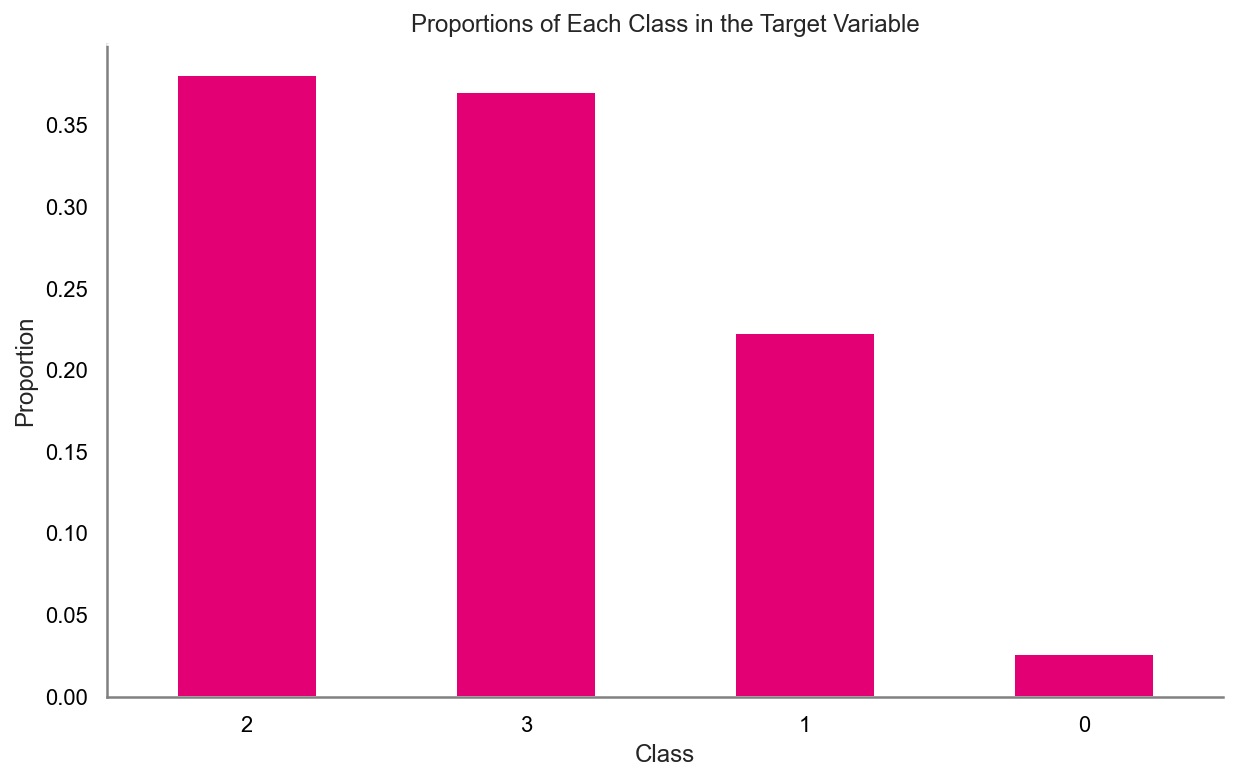

In [100]:
# Proportion of each class in the target variable
class_counts = merged_final['Target'].value_counts(normalize=True)  # normalize=True to get proportions

# Create a bar chart with no background color in the plot area
plt.figure(figsize=(10, 6))
ax = class_counts.plot(kind='bar', color= colors['magenta'])
plt.title('Proportions of Each Class in the Target Variable')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keeps class labels horizontal
plt.grid(True, linestyle='--', alpha=0.6)  # Adds a grid for easier reading

# Set the plot background to be transparent (while keeping axes visible)
ax.set_facecolor('none')  # Makes the plot background transparent

# Optional: Specify the color of the axes and ticks to ensure visibility
ax.spines['bottom'].set_color('grey')  # Color of the bottom spine
ax.spines['left'].set_color('grey')  # Color of the left spine
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Show the plot
plt.show()

From the graph above we can see that the classes are imbalanced. More than 70% of the data belong to class 2 or 3

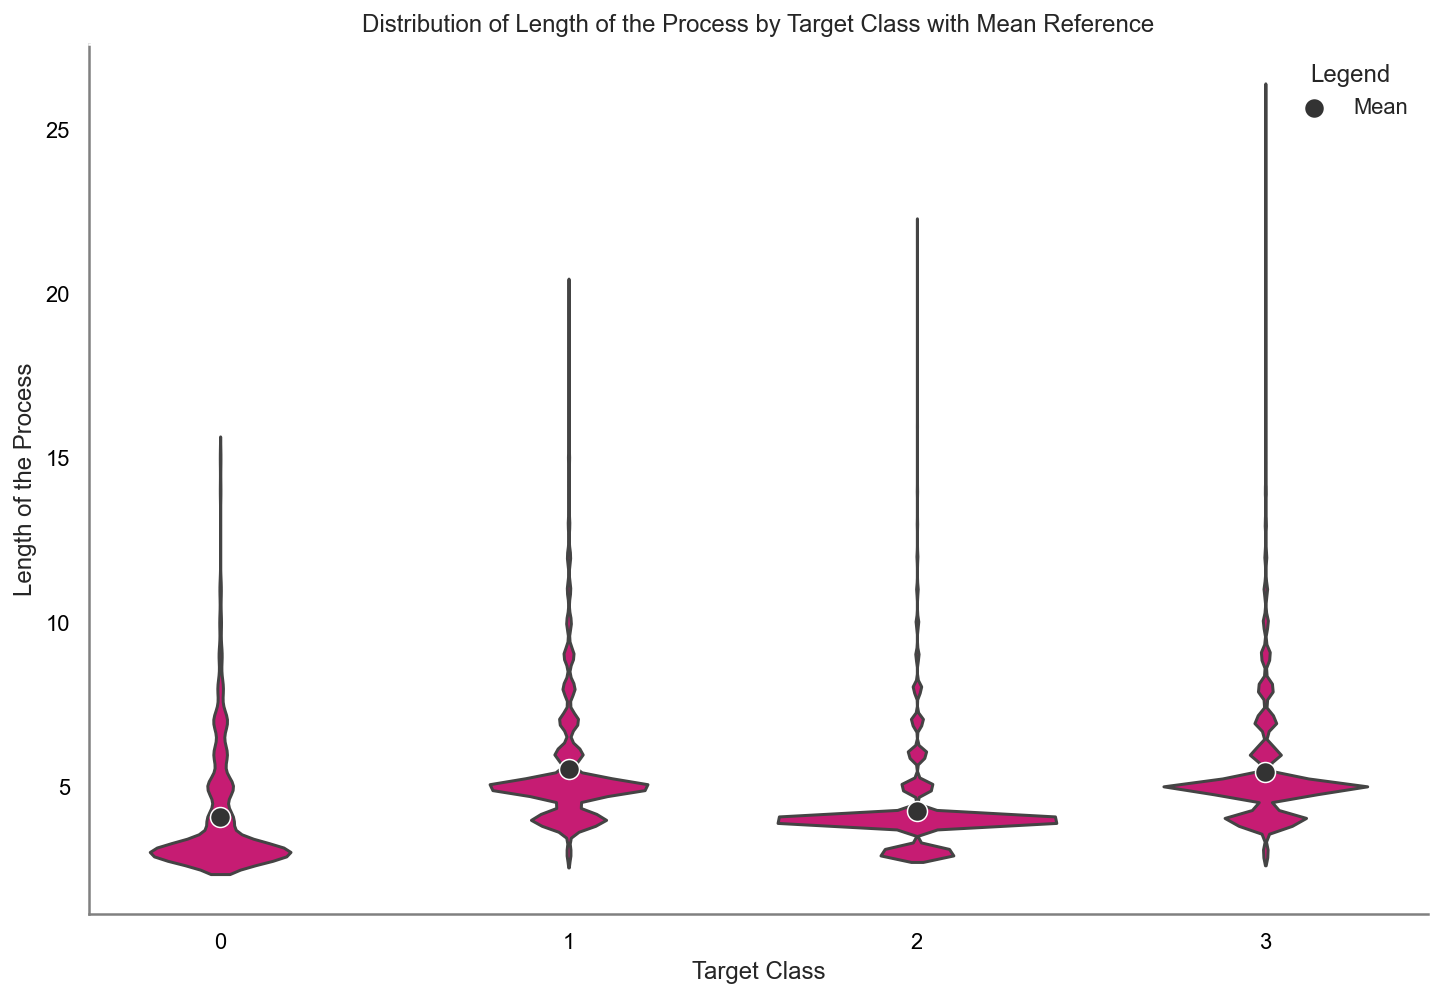

In [101]:
# Distribution of Number of Activities in Each Process by Target

# Calculate means
means = merged_final.groupby('Target')['Length of the Process'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='Target', y='Length of the Process', data=merged_final, inner=None, color=colors['magenta'])

# Calculate positions for plotting means accurately
target_order = merged_final['Target'].sort_values().unique()
means['Position'] = means['Target'].apply(lambda x: np.where(target_order == x)[0][0])

# Plotting the means with adjusted positions
mean_dots = sns.scatterplot(x='Position', y='Length of the Process', data=means, color=colors['dark_gray'], s=100, zorder=3, label='Mean')

# Customize the plot for no background color
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Adding a legend specifically for the means
plt.legend(title='Legend', loc='upper right', frameon=False)

# Customize the plot without grid lines
plt.title('Distribution of Length of the Process by Target Class with Mean Reference')
plt.xlabel('Target Class')
plt.ylabel('Length of the Process')

# Show the plot
plt.show()

We wanted to check whether or not the distribution of lenght of the process was different between classes. Althought some are usually a bit longer than others overall the difference does not seem to be significant

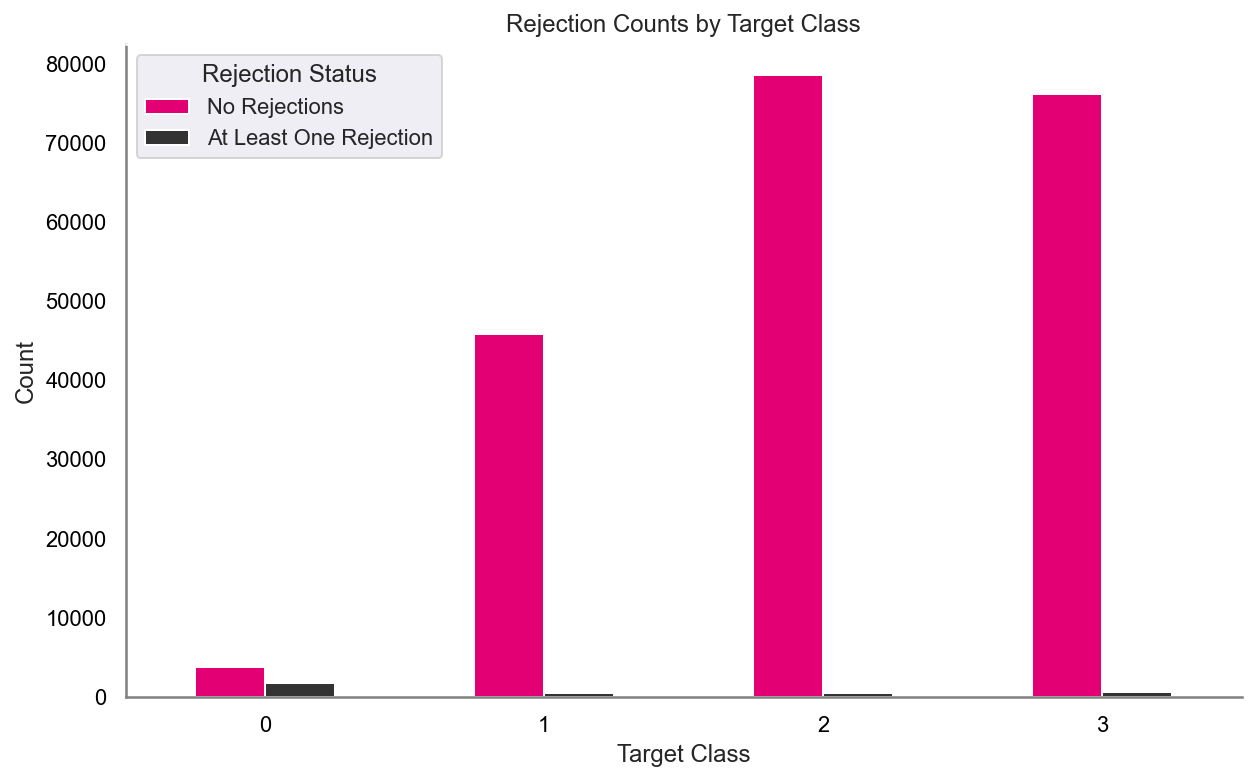

In [102]:
# Activities rejected throughout a process by Target

# Creating a contingency table
contingency_table = pd.crosstab(merged_final['Target'], merged_final['Rejections'])
bar_color = [colors['magenta'], colors['dark_gray']]

# Plotting a grouped bar chart
ax = contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=bar_color)
plt.title('Rejection Counts by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.legend(title='Rejection Status', labels=['No Rejections', 'At Least One Rejection'])

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Show the plot
plt.show()

In all target classes there are proccess with at least one rejection. However class 0 stands out by having the least amount of data and still being the class with more proccess with at least one rejection

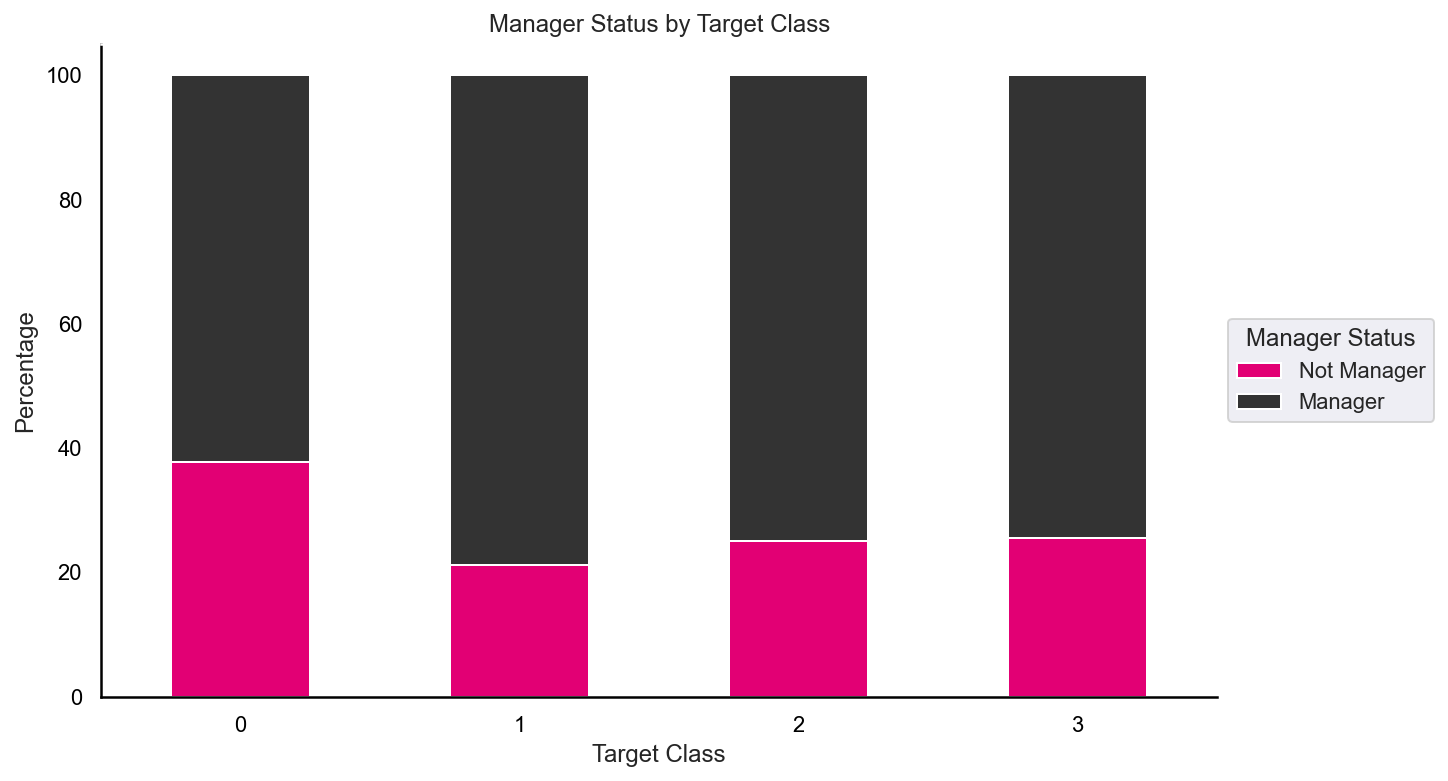

In [103]:
#Manager Proportions in each Target
# Create a crosstab and normalize by row to get proportions
manager_distribution = pd.crosstab(merged_final['Target'], merged_final['Is Manager'], normalize='index')

# Convert proportions to percentages for easier interpretation
manager_distribution *= 100

# Plotting using specific colors from the dictionary
ax = manager_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['magenta'], colors['dark_gray']])
plt.title('Manager Status by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Percentage')
plt.legend(title='Manager Status', labels=['Not Manager', 'Manager'])

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Rotate x-axis labels to vertical
plt.xticks(rotation=0)  # Rotate labels vertically

# Move the legend outside the plot
plt.legend(title='Manager Status', labels=['Not Manager', 'Manager'], loc='center left', bbox_to_anchor=(1,0.5))

# Show the plot
plt.show()

Proportionally there are more managers in all processes.

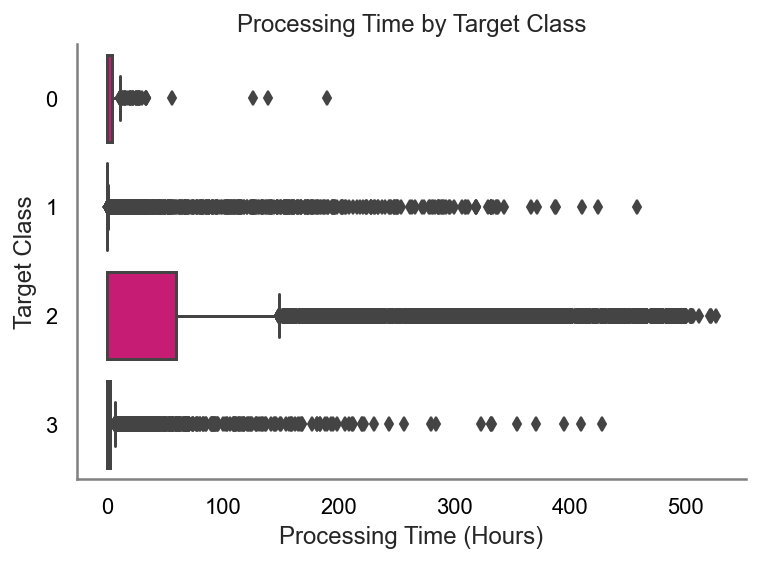

In [104]:
# Total Duration of the process by Target

merged_final_viz = merged_final.copy()

# Assuming 'Period between arrival and execution' is in hours
merged_final_viz['Processing Time in Hours'] = merged_final_viz['Period between arrival and execution'] / 24

# Creating the boxplot
ax = sns.boxplot(y='Target', x='Processing Time in Hours', data=merged_final_viz, orient='h', color=colors['magenta'])
plt.title('Processing Time by Target Class')
plt.ylabel('Target Class')  # Now the y-axis is the categorical variable
plt.xlabel('Processing Time (Hours)')  # And the x-axis is the continuous variable

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(False)  # Ensuring the top border is not visible
ax.spines['right'].set_visible(False)  # Ensuring the right border is not visible
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Remove grid lines
ax.grid(False)

# Show the plot
plt.show()

The target class 2 has a bigger range of how long it can take, it also has the maximum amount of hours a proccess can take more than 500 hours (more than 20 full days). All target classes are very heavy in terms of outliers

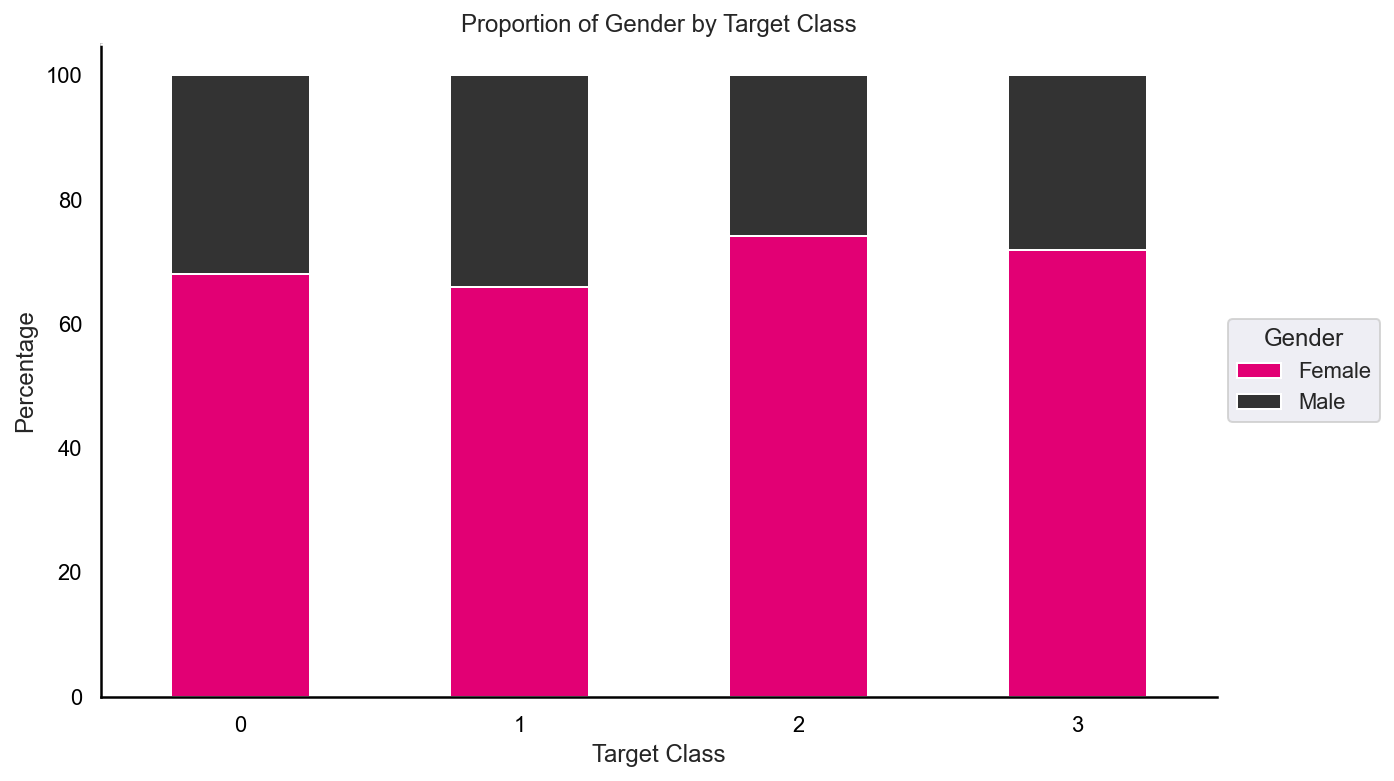

In [105]:
# Gender Proportions in each Target

# Create a crosstab and normalize by row to get proportions
gender_distribution = pd.crosstab(merged_final['Target'], merged_final['Sex'], normalize='index')

# Convert proportions to percentages if more interpretable
gender_distribution *= 100

# Plotting
ax = gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['magenta'], colors['dark_gray']])
plt.title('Proportion of Gender by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Percentage')
plt.legend(title='Gender')

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Rotate x-axis labels to vertical
plt.xticks(rotation=0)  # Rotate labels vertically

# Move the legend outside the plot
plt.legend(title='Gender', labels=['Female', 'Male'], loc='center left', bbox_to_anchor=(1,0.5))

# Show the plot
plt.show()


The Gender Proportion by Target class is always very similar. This could mean that this is the reality of Millenium, it has more female employees. At least working in these specific processes

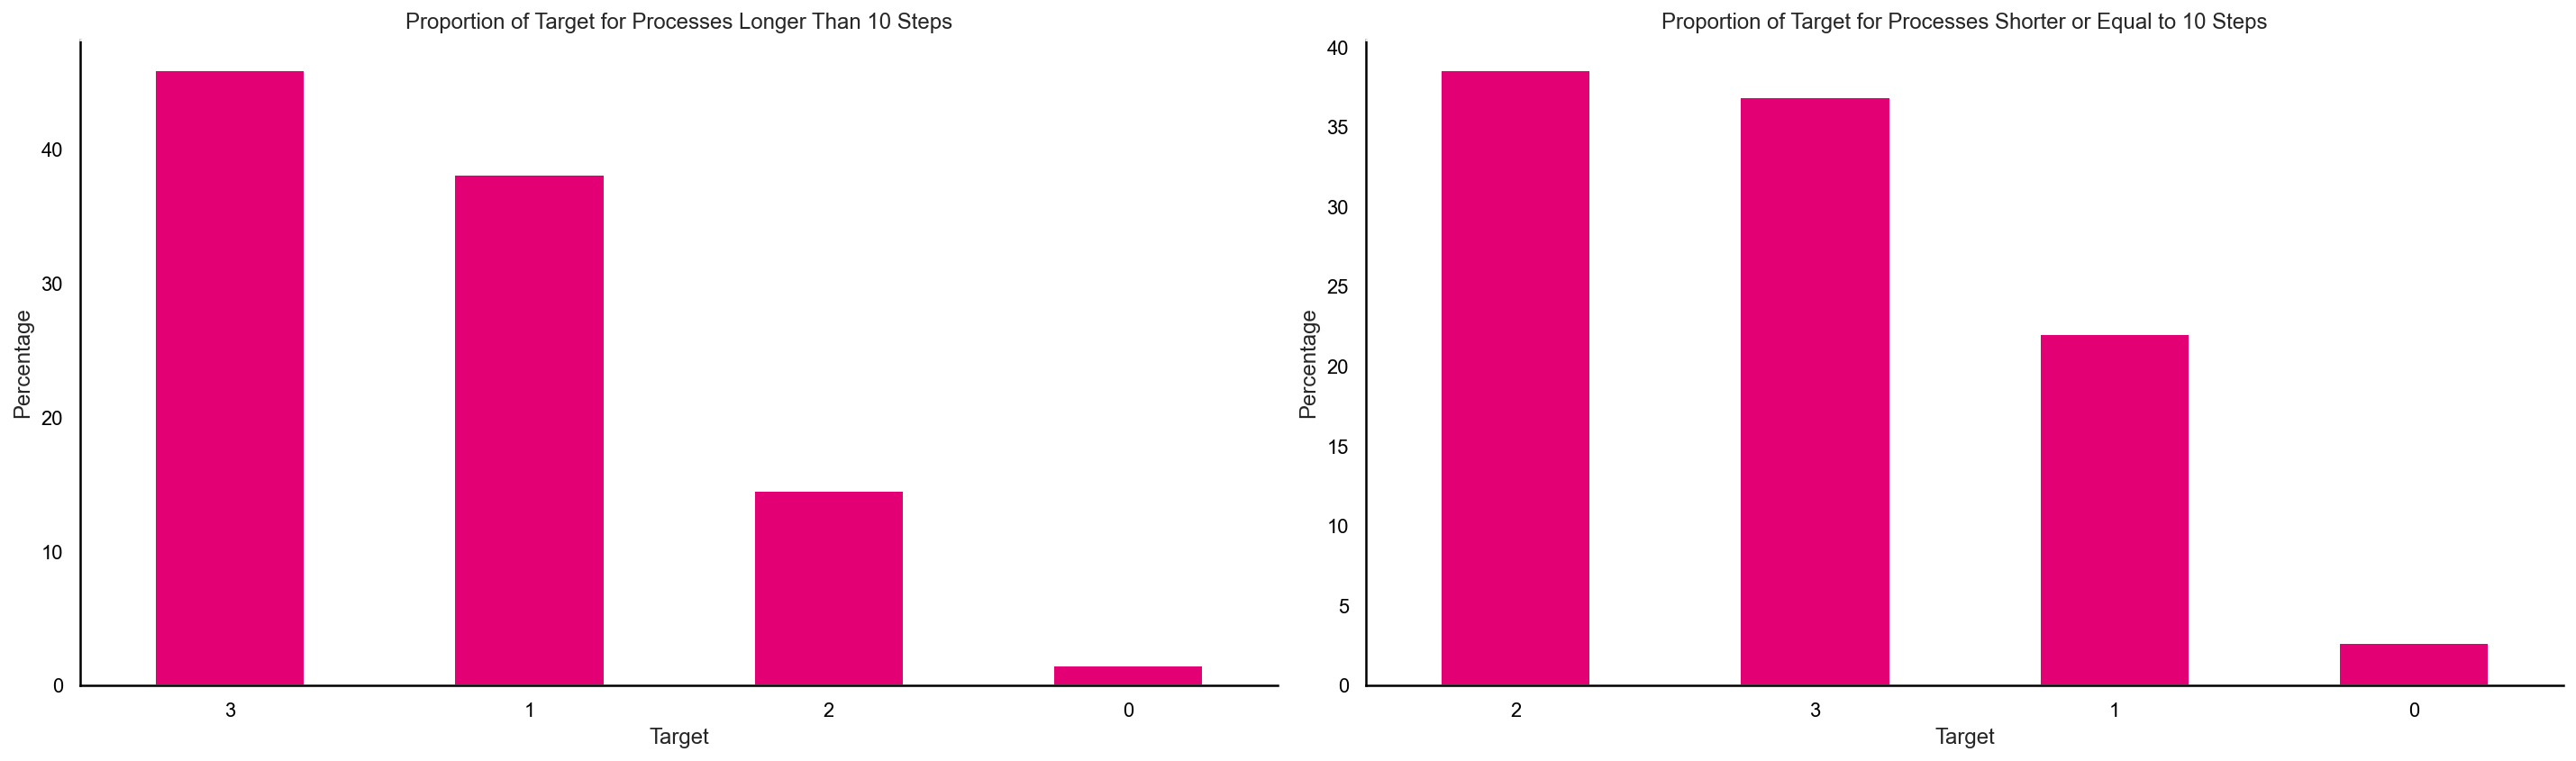

In [106]:
# Filter the dataset for processes longer than 10 steps
filtered_data_long = merged_final[merged_final['Length of the Process']>10]

# Calculate proportions of each outcome
target_counts_long = filtered_data_long['Target'].value_counts(normalize=True)

# Convert proportions to percentages for easier interpretation
target_percentages_long = target_counts_long * 100

# Filter the dataset for processes shorter or equal to 10 steps
filtered_data_short = merged_final[merged_final['Length of the Process'] <= 10]

# Calculate proportions of each outcome
target_counts_short = filtered_data_short['Target'].value_counts(normalize=True)

# Convert proportions to percentages for easier interpretation
target_percentages_short = target_counts_short * 100

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for processes longer than 10 steps
ax1 = target_percentages_long.plot(kind='bar', ax=axs[0], color=colors['magenta'])
ax1.set_title('Proportion of Target for Processes Longer Than 10 Steps')
ax1.set_xlabel('Target')
ax1.set_ylabel('Percentage')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Set the background color to none for plot, axes, and figure
ax1.set_facecolor('none')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

# Plot for processes shorter or equal to 10 steps
ax2 = target_percentages_short.plot(kind='bar', ax=axs[1], color=colors['magenta'])
ax2.set_title('Proportion of Target for Processes Shorter or Equal to 10 Steps')
ax2.set_xlabel('Target')
ax2.set_ylabel('Percentage')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Set the background color to none for plot, axes, and figure
ax2.set_facecolor('none')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.tick_params(axis='x',colors='black')
ax2.tick_params(axis='y', colors='black')

# Set the figure background to none
fig.patch.set_facecolor('none')

# Show the plot
plt.tight_layout()
plt.show()


From these graphs we can conclude that the distribution of target classes is different for longer and shorter Processes

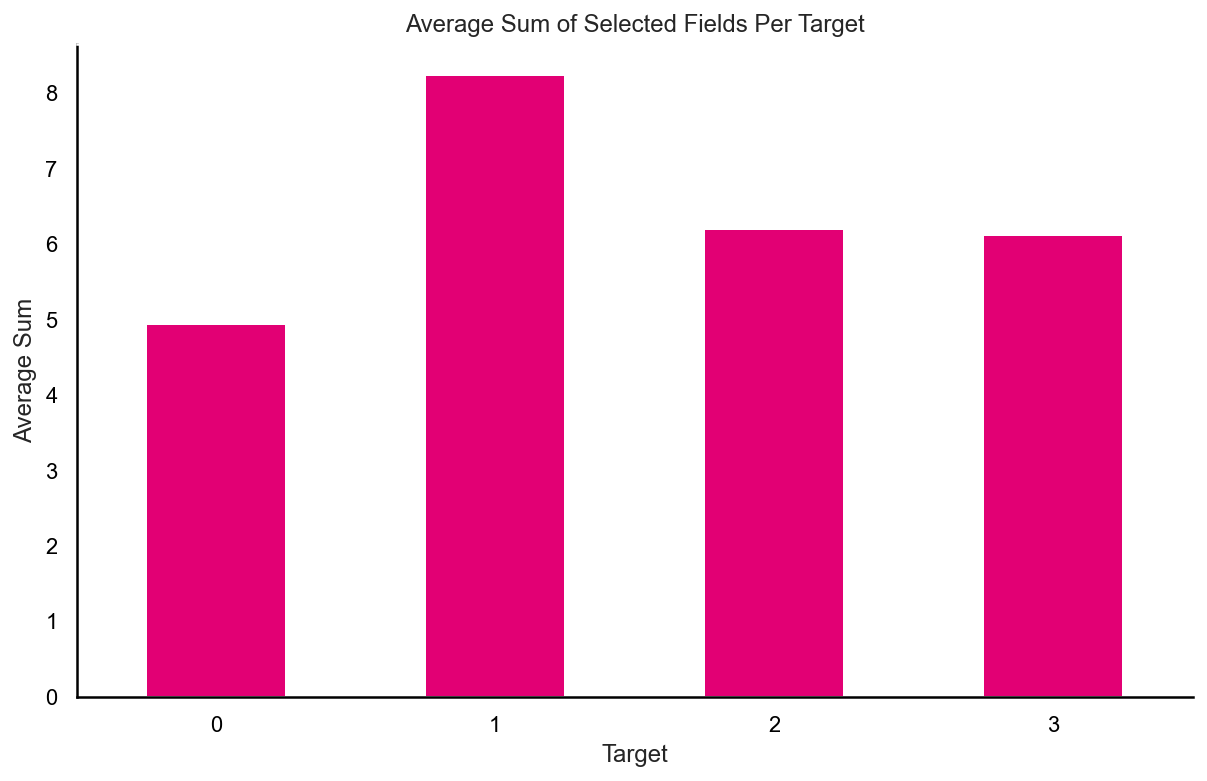

In [107]:
# List of column names to sum
columns_to_sum = [
    'idField_203', 'idField_3486', 'idField_3388', 'idField_3391', 
    'idField_3390', 'idField_3491', 'idField_3420', 'idField_3935', 
    'idField_47', 'idField_1602', 'idField_1604'
]

# Add a new column that is the sum of the specified columns
merged_final_viz['Total Sum'] = merged_final_viz[columns_to_sum].sum(axis=1)

# Calculate the average sum per target
average_sum_per_target = merged_final_viz.groupby('Target')['Total Sum'].mean()
# Plotting the average sum per target
plt.figure(figsize=(10, 6))
ax = average_sum_per_target.plot(kind='bar', color=colors['magenta'])  # Using 'magenta' as the bar color

# Customize the plot to maintain consistency in presentation
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background
ax.spines['bottom'].set_color('black')  # Black color for the bottom spine
ax.spines['left'].set_color('black')  # Black color for the left spine
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Black color for the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Black color for the y-axis ticks
# Set titles and labels with proper alignment and rotation
plt.title('Average Sum of Selected Fields Per Target')
plt.xlabel('Target')
plt.ylabel('Average Sum')
plt.xticks(rotation=0)  # Adjust rotation as needed

# Show the plot
plt.show()

Here we can see that normally outcome 1 has a more filled in value fields

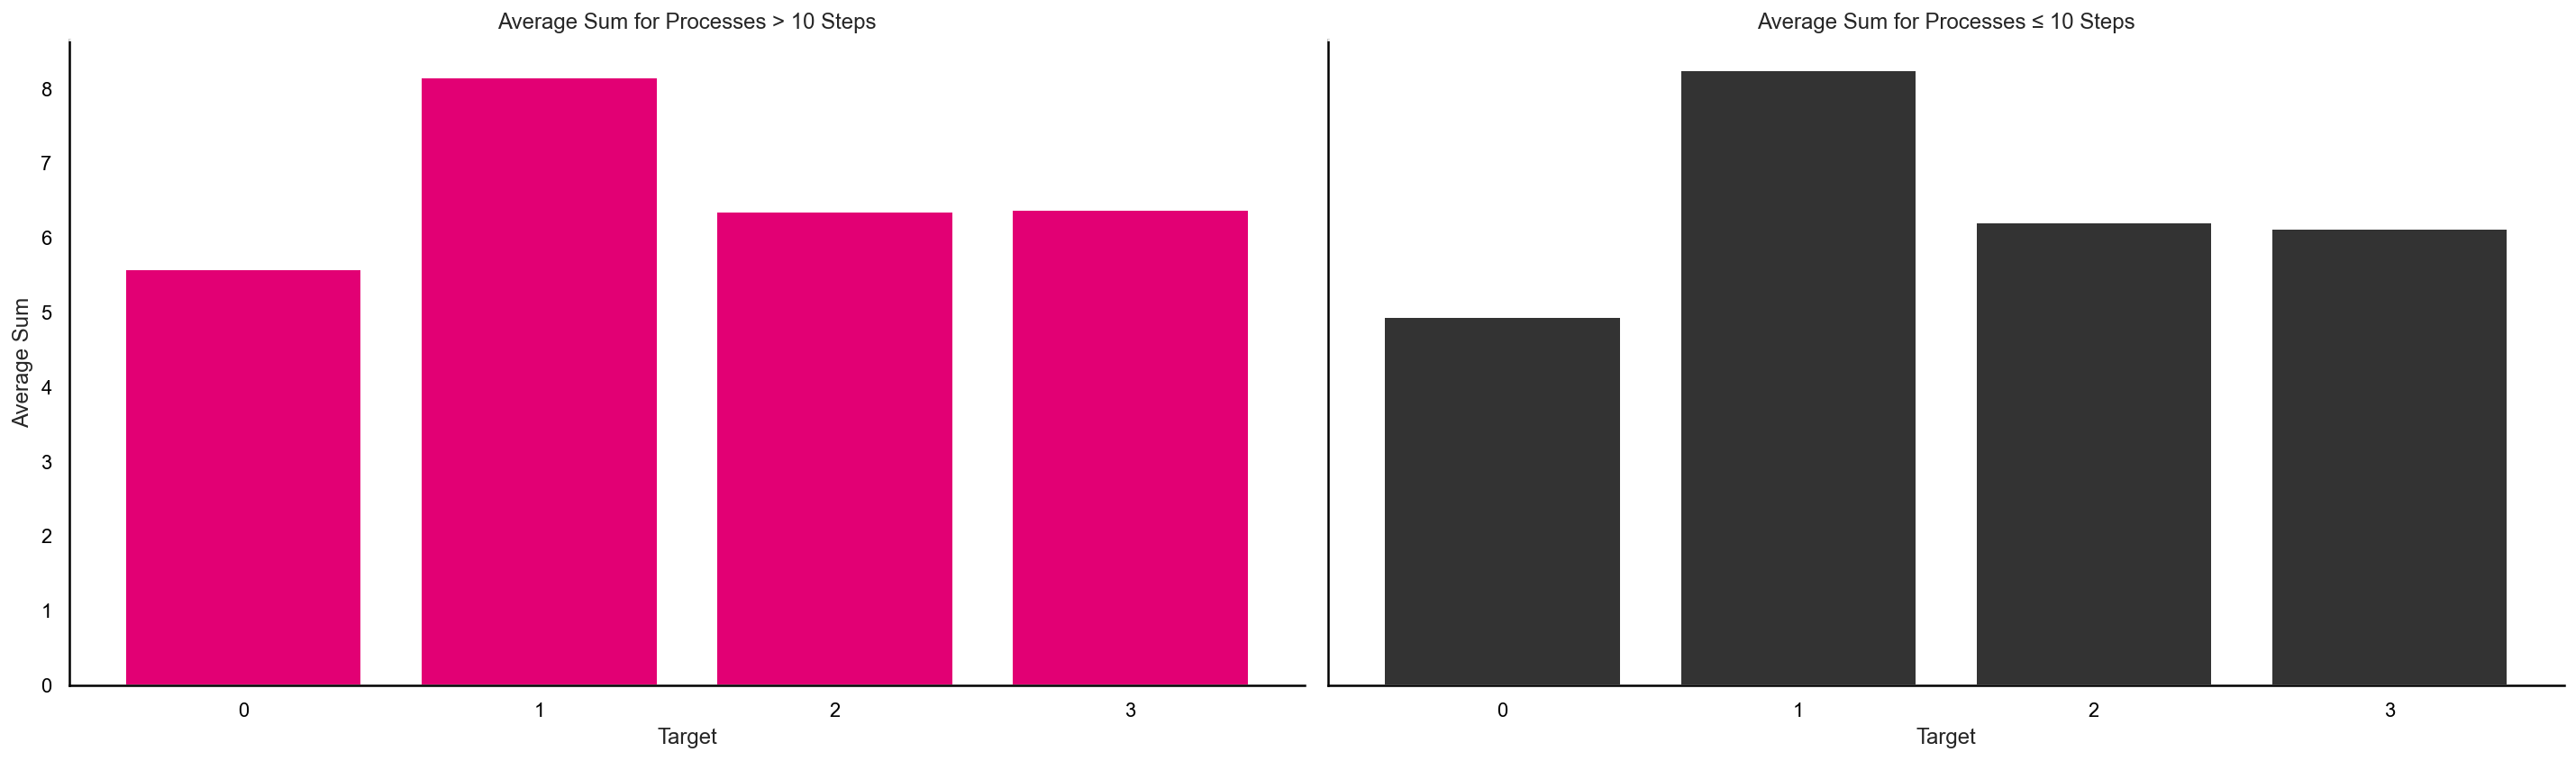

In [108]:
## Prepare data for both filters
filtered_data_long = merged_final_viz[merged_final_viz['Length of the Process'] > 10]
average_sum_per_target_long = filtered_data_long.groupby('Target')['Total Sum'].mean()

filtered_data_short = merged_final_viz[merged_final_viz['Length of the Process'] <= 10]
average_sum_per_target_short = filtered_data_short.groupby('Target')['Total Sum'].mean()

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

# Plot for processes longer than 10 steps
axes[0].bar(average_sum_per_target_long.index, average_sum_per_target_long, color=colors['magenta'])
axes[0].set_title('Average Sum for Processes > 10 Steps')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Average Sum')
axes[0].tick_params(axis='x', labelrotation=0)  # Ensure labels are not rotated
axes[0].set_xticks(average_sum_per_target_long.index)  # Ensure x-ticks are correctly set
axes[0].set_xticklabels(average_sum_per_target_long.index)  # Optionally format or reorder labels

# Plot for processes shorter or equal to 10 steps
axes[1].bar(average_sum_per_target_short.index, average_sum_per_target_short, color=colors['dark_gray'])
axes[1].set_title('Average Sum for Processes ≤ 10 Steps')
axes[1].set_xlabel('Target')
axes[1].tick_params(axis='x', labelrotation=0)
axes[1].set_xticks(average_sum_per_target_short.index)
axes[1].set_xticklabels(average_sum_per_target_short.index)

# Customize the appearance
for ax in axes:
    ax.set_facecolor('none')
    plt.gca().set_facecolor('none')
    plt.gcf().set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

# Ensure layout is neat
plt.tight_layout()

# Show the plot
plt.show()

There's no difference for the average sum of id fields in processes over 10 or under or equal to 10 steps

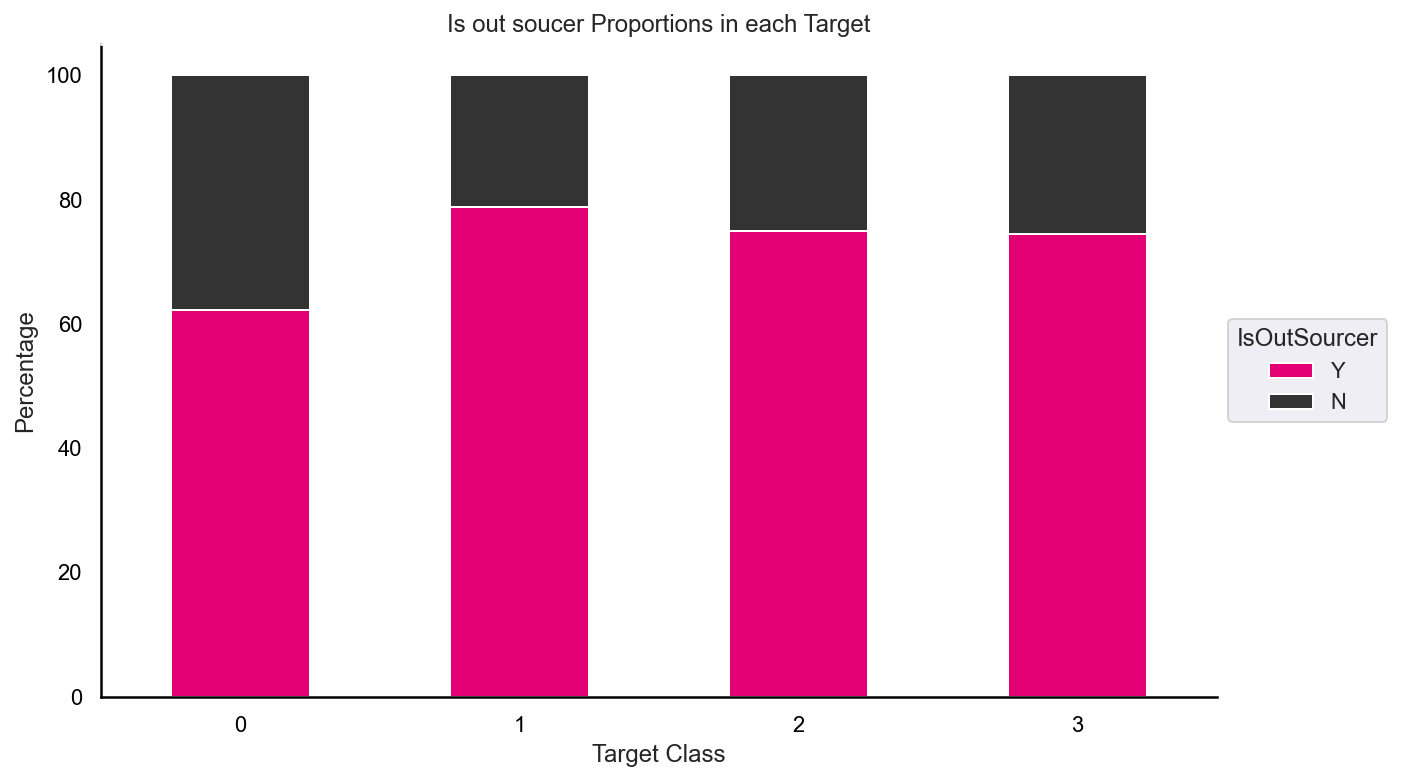

In [109]:
# Is out soucer Proportions in each Target

# Create a crosstab and normalize by row to get proportions
outsourcer_distribution = pd.crosstab(merged_final['Target'], merged_final['IsOutSourcer'], normalize='index')

# Convert proportions to percentages if more interpretable
outsourcer_distribution *= 100

# Plotting
ax = outsourcer_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['magenta'], colors['dark_gray']])
plt.title('Is out soucer Proportions in each Target')
plt.xlabel('Target Class')
plt.ylabel('Percentage')
plt.legend(title='IsOutSourcer')

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Rotate x-axis labels to vertical
plt.xticks(rotation=0)  # Rotate labels vertically

# Move the legend outside the plot
plt.legend(title='IsOutSourcer', labels=['Y', 'N'], loc='center left', bbox_to_anchor=(1,0.5))

# Show the plot
plt.show()

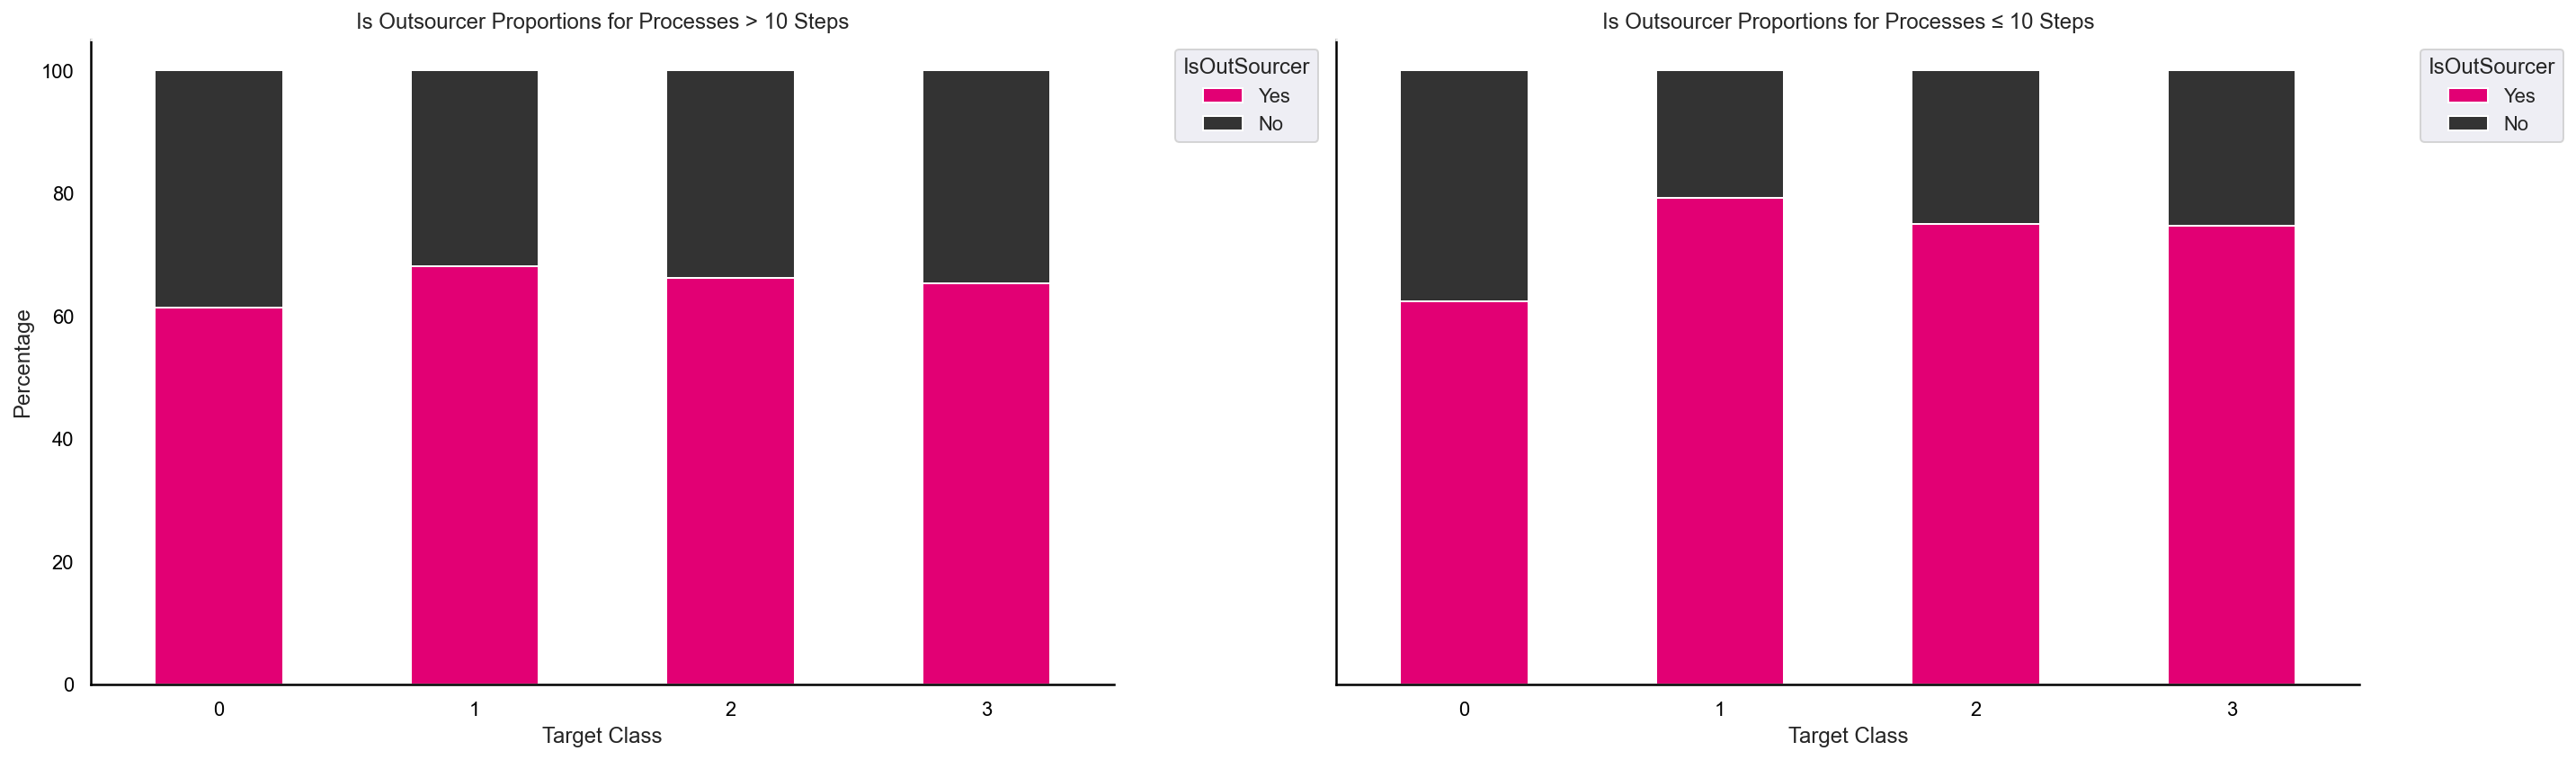

In [110]:
# Define filters
filtered_data_long = merged_final_viz[merged_final_viz['Length of the Process'] > 10]
filtered_data_short = merged_final_viz[merged_final_viz['Length of the Process'] <= 10]

# Create crosstab and normalize by row to get proportions for data longer than 10 steps
outsourcer_distribution_long = pd.crosstab(filtered_data_long['Target'], filtered_data_long['IsOutSourcer'], normalize='index') * 100

# Create crosstab and normalize by row to get proportions for data shorter or equal to 10 steps
outsourcer_distribution_short = pd.crosstab(filtered_data_short['Target'], filtered_data_short['IsOutSourcer'], normalize='index') * 100

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

# Plotting for data longer than 10 steps
outsourcer_distribution_long.plot(kind='bar', stacked=True, ax=axes[0], color=[colors['magenta'], colors['dark_gray']])
axes[0].set_title('Is Outsourcer Proportions for Processes > 10 Steps')
axes[0].set_xlabel('Target Class')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='IsOutSourcer', labels=['Yes', 'No'], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plotting for data shorter or equal to 10 steps
outsourcer_distribution_short.plot(kind='bar', stacked=True, ax=axes[1], color=[colors['magenta'], colors['dark_gray']])
axes[1].set_title('Is Outsourcer Proportions for Processes ≤ 10 Steps')
axes[1].set_xlabel('Target Class')
axes[1].legend(title='IsOutSourcer', labels=['Yes', 'No'], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Customize the plots' appearance
for ax in axes:
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

# Ensure layout is neat
plt.tight_layout()

# Show the plots
plt.show()



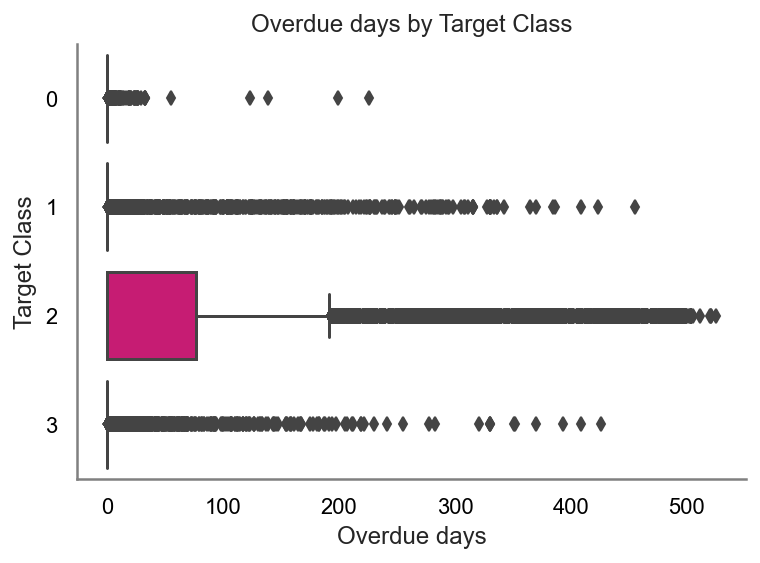

In [111]:
# Overdue days of the process by Target

# Creating the boxplot
ax = sns.boxplot(y='Target', x='Overdue Days', data=merged_final_viz, orient='h', color=colors['magenta'])
plt.title('Overdue days by Target Class')
plt.ylabel('Target Class')  # Now the y-axis is the categorical variable
plt.xlabel('Overdue days')  # And the x-axis is the continuous variable

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(False)  # Ensuring the top border is not visible
ax.spines['right'].set_visible(False)  # Ensuring the right border is not visible
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Remove grid lines
ax.grid(False)

# Show the plot
plt.show()

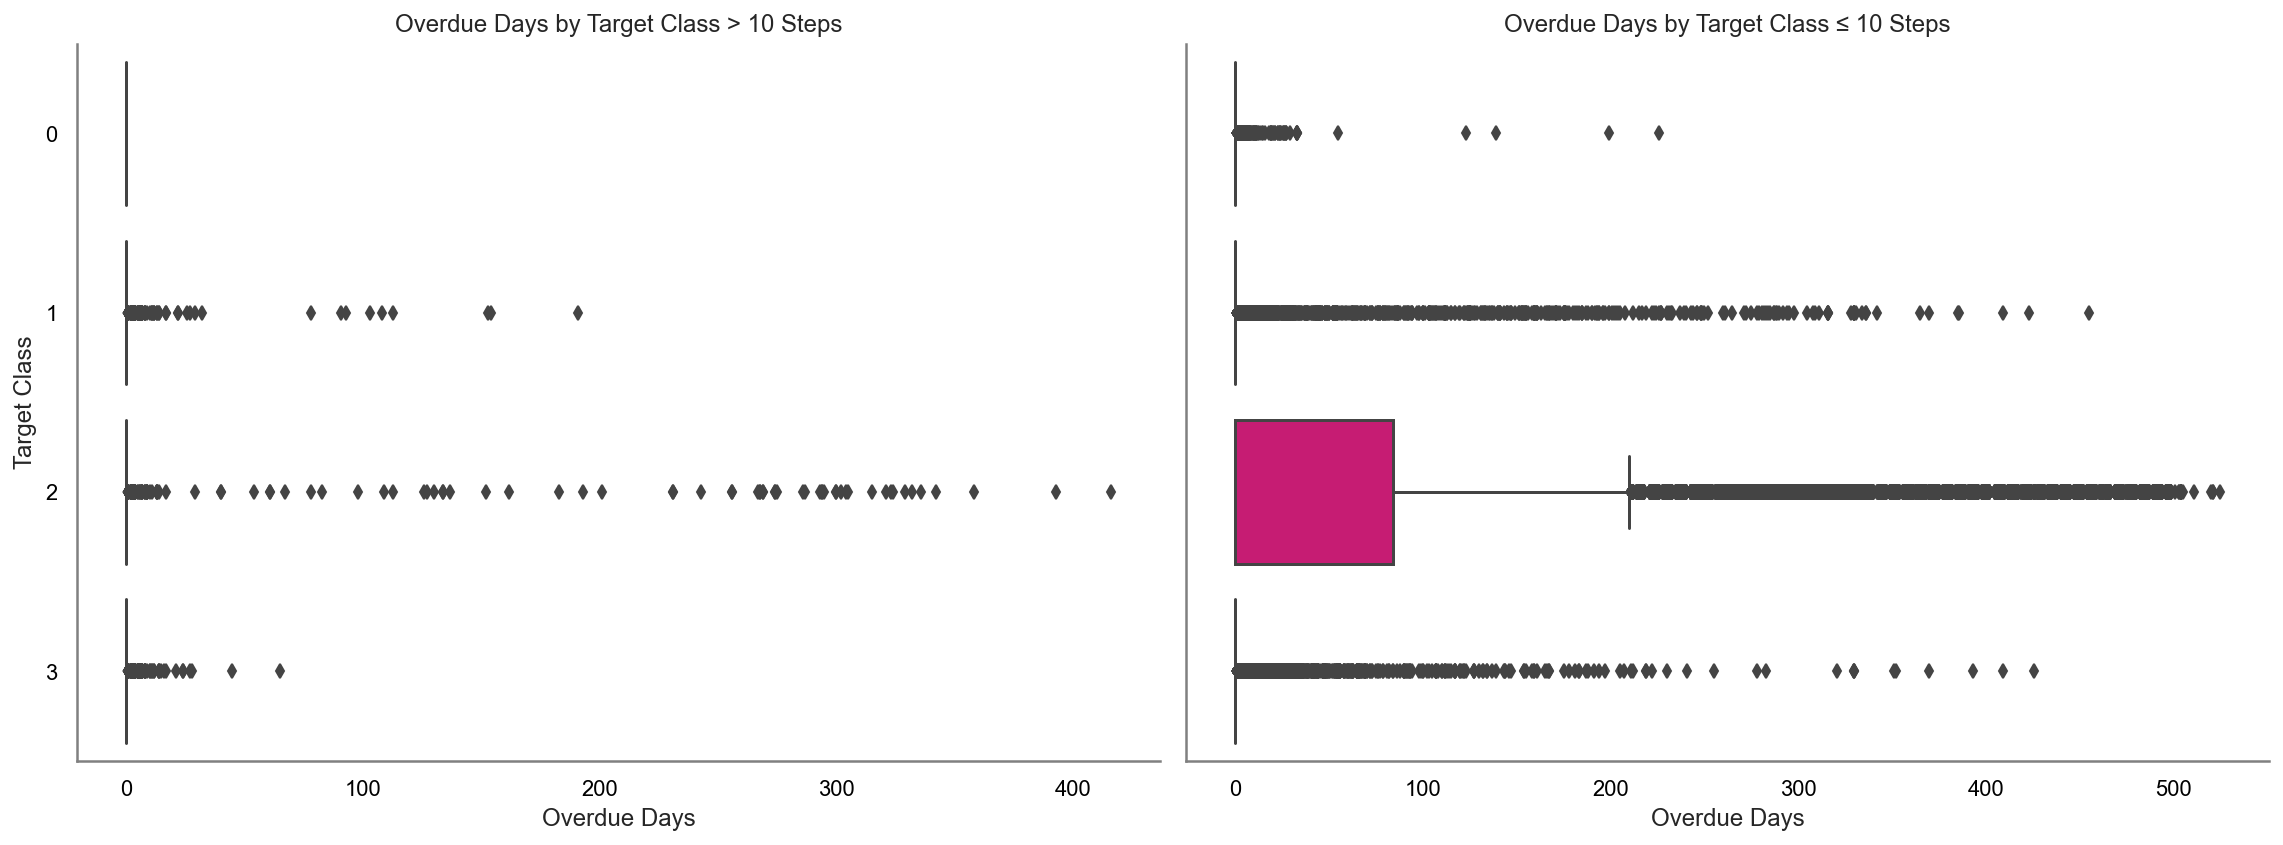

In [112]:
# Filter the dataset for processes longer than 10 steps
filtered_data_long = merged_final_viz[merged_final_viz['Length of the Process'] > 10]

# Filter the dataset for processes shorter or equal to 10 steps
filtered_data_short = merged_final_viz[merged_final_viz['Length of the Process'] <= 10]

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)


# Plotting for data longer than 10 steps
sns.boxplot(y='Target', x='Overdue Days', data=filtered_data_long, orient='h', color=colors['magenta'], ax=axes[0])
axes[0].set_title('Overdue Days by Target Class > 10 Steps')
axes[0].set_xlabel('Overdue Days')
axes[0].set_ylabel('Target Class')

# Plotting for data shorter or equal to 10 steps
sns.boxplot(y='Target', x='Overdue Days', data=filtered_data_short, orient='h', color=colors['magenta'], ax=axes[1])
axes[1].set_title('Overdue Days by Target Class ≤ 10 Steps')
axes[1].set_xlabel('Overdue Days')
axes[1].set_ylabel('')

# Customize the plots' appearance
for ax in axes:
    ax.set_facecolor('none')  # No color in the plot background
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_visible(False)  # Ensuring the top border is not visible
    ax.spines['right'].set_visible(False)  # Ensuring the right border is not visible
    ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
    ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks
    ax.grid(False)  # Remove grid lines

# Ensure layout is neat and labels do not overlap
plt.tight_layout()

# Show the plots
plt.show()



We can see differences in the amount of overdue days by Target class over or under/equal to 10 steps, however this would be expected since the longer the procces the more things can go wrong and the more timeline would be extended

Proportion of Looped Processes: 24.35%


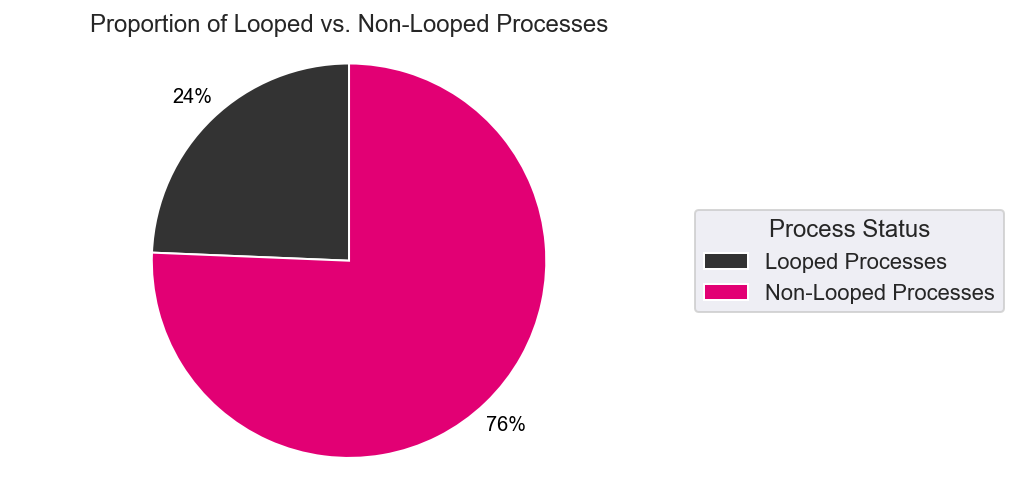

In [113]:
# Group by Request Identifier and Task ID, then count occurrences
task_counts = merged_final_viz.groupby(['Request Identifier', 'Actvity ID']).size().reset_index(name='Counts')

# Identify Request Identifiers with looped tasks
looped_identifiers = task_counts[task_counts['Counts'] > 1]['Request Identifier'].unique()

# Create a new column in the original DataFrame to mark looped processes
merged_final_viz['Is Looped'] = merged_final_viz['Request Identifier'].isin(looped_identifiers).astype(int)

# Calculate proportions of looped and non-looped processes
proportion_looped = merged_final_viz['Is Looped'].mean() * 100  # Convert proportion to percentage

# Print proportion of looped processes
print(f"Proportion of Looped Processes: {proportion_looped:.2f}%")

# Prepare data for the pie chart
labels = ['Looped Processes', 'Non-Looped Processes']
sizes = [proportion_looped, 100 - proportion_looped]

pie_colors = [colors['dark_gray'],colors['magenta']]  # Array of colors for the pie chart

# Plotting the pie chart with custom colors, no slice outlines, and labels positioned outside
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    colors=pie_colors,
    autopct=lambda pct: "{:1.0f}%".format(pct) if pct > 0 else '',  # Using lambda to format percentages without decimals
    startangle=90, 
    pctdistance=1.15,  # Adjust this value to move the text closer or further from the center
    textprops={'color': "black", 'fontsize': 10},
    wedgeprops={}
)

# Add a legend outside the plot using wedges for reference and not specifying labels directly in pie()
ax.legend(wedges, labels, title="Process Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure that pie is drawn as a circle.
ax.axis('equal')

# Set title for the chart
plt.title('Proportion of Looped vs. Non-Looped Processes')

# Show the plot
plt.show()

Most of the processes are not looped, meaning, they don't repeat activity ID's

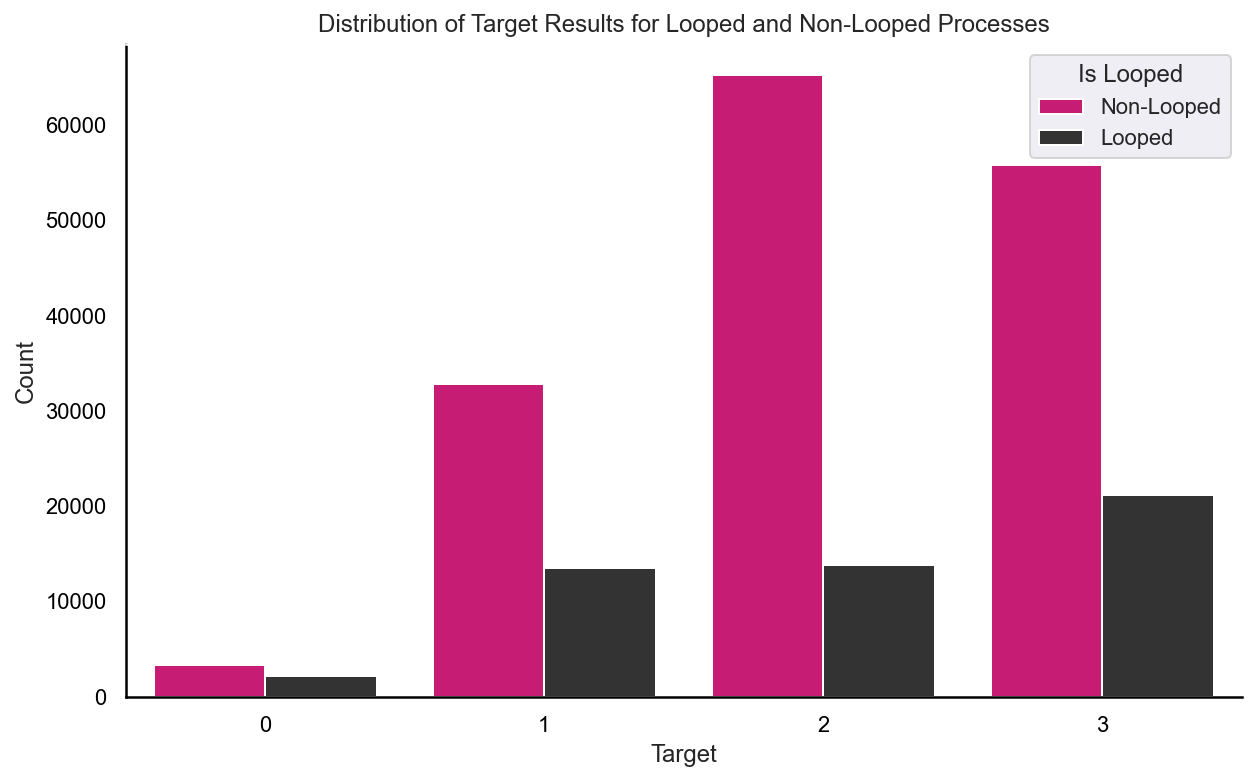

In [114]:
# Define looped processes as described
task_counts = merged_final_viz.groupby(['Request Identifier', 'Actvity ID']).size().reset_index(name='Counts')
looped_identifiers = task_counts[task_counts['Counts'] > 1]['Request Identifier'].unique()
merged_final_viz['Is Looped'] = merged_final_viz['Request Identifier'].isin(looped_identifiers).astype(int)

# Create the count plot
plt.figure(figsize=(10, 6))
palette = [colors['magenta'],colors['dark_gray']]
ax = sns.countplot(data=merged_final_viz, x='Target', hue='Is Looped', palette=palette)

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Customize the plot
plt.title('Distribution of Target Results for Looped and Non-Looped Processes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Is Looped', labels=['Non-Looped', 'Looped'])

# Show the plot
plt.show()


There is no clear target category for all looped or non-looped processes

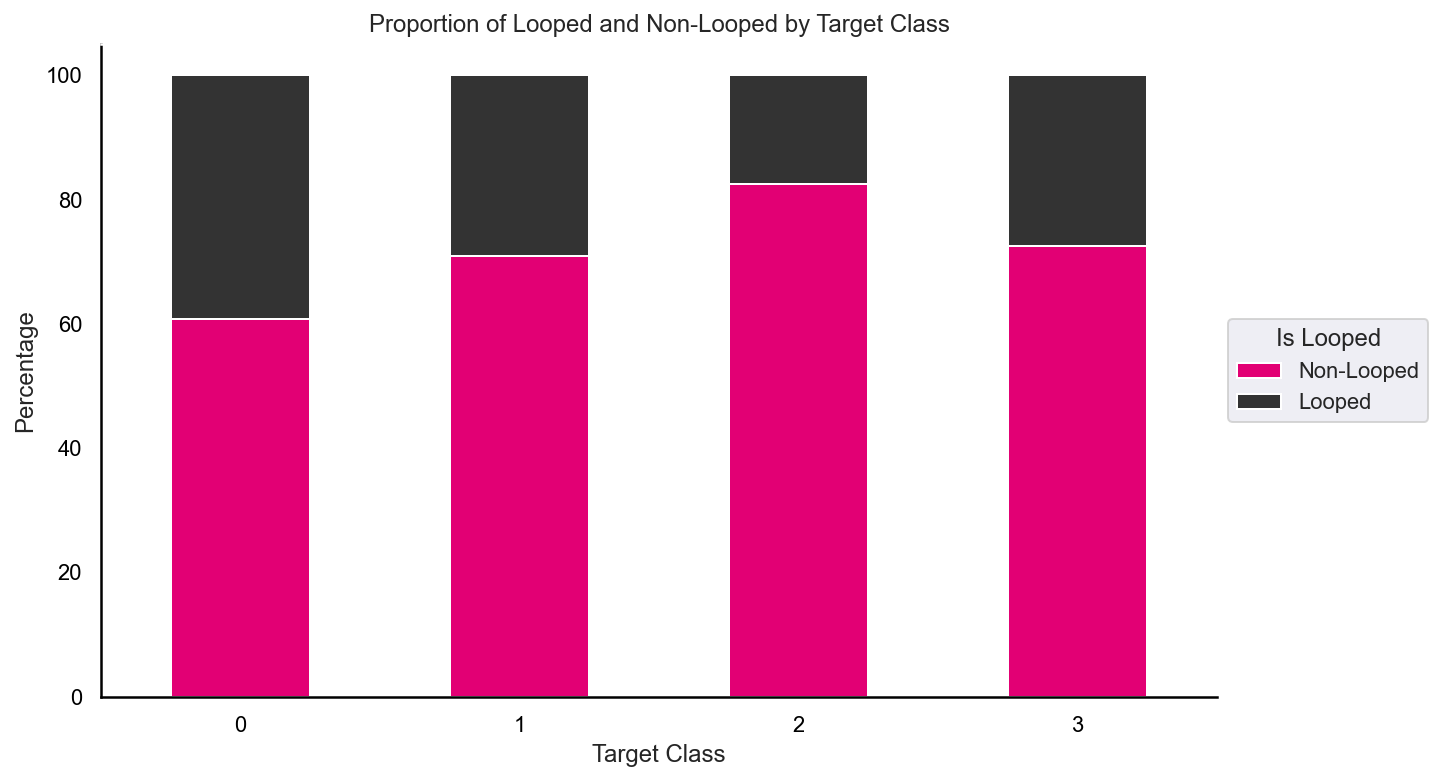

In [115]:
# Create a crosstab and normalize by row to get proportions
looped_distribution = pd.crosstab(merged_final_viz['Target'], merged_final_viz['Is Looped'], normalize='index')

# Convert proportions to percentages if more interpretable
looped_distribution *= 100

# Plotting
ax = looped_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['magenta'],colors['dark_gray']])
plt.title('Proportion of Looped and Non-Looped by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Percentage')
plt.legend(title='Is Looped')

# Set the background color to none for plot, axes, and figure
ax.set_facecolor('none')  # No color in the plot background
plt.gca().set_facecolor('none')  # No color in the axes background
plt.gcf().set_facecolor('none')  # No color in the figure background

# Ensure the axes are visible
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(True)  # Ensuring the top border is visible if needed
ax.spines['right'].set_visible(True)  # Ensuring the right border is visible if needed
ax.tick_params(axis='x', colors='black')  # Color of the x-axis ticks
ax.tick_params(axis='y', colors='black')  # Color of the y-axis ticks

# Rotate x-axis labels to vertical
plt.xticks(rotation=0)  # Rotate labels vertically

# Move the legend outside the plot
plt.legend(title='Is Looped', labels=['Non-Looped', 'Looped'], loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


The proportion of looped vs non-looped targets in each target class are pretty similar 


<a class="anchor" id="inc">

## Exploration of Inconsistencies
###### [Go back to Contents](#top)
</a>


This section below aims to check the existence of incosistencies, values that do not make sense.

Conclusions at the end of the section

In [246]:
# Check if Activity ID 100 is associated with a NaN value in Task predicted end date
activity100 = (merged_final[merged_final['Actvity ID'] == "100"]['Task predicted end date'].isna()).all()
print("Is Activity ID 100 allways associated with a NaN value in Task predicted end date?",activity100)

Is Activity ID 100 allways associated with a NaN value in Task predicted end date? True


In [247]:

# Filter the DataFrame to find request identifiers that don't have both Task Type as 'Initial Request' and 'Final Task'
filtered_data = merged_final.groupby('Request Identifier').filter(lambda x: ('Initial Request' not in x['Task Type'].values) or ('Final Task' not in x['Task Type'].values))

print("Request identifiers that don't have both Initial Request and Final Task:")
print(filtered_data['Request Identifier'].unique())

Request identifiers that don't have both Initial Request and Final Task:
['1' '2' '4' ... '45770' '45771' '45772']


In [248]:
# Find the request identifier with the maximum length of the process
max_length = merged_final.groupby('Request Identifier')['Length of the Process'].max().idxmax()

# Find the request identifier with the minimum length of the process
min_length = merged_final.groupby('Request Identifier')['Length of the Process'].min().idxmin()

print("Request identifier with the maximum length of the process:", max_length)
print("Request identifier with the minimum length of the process:", min_length)

Request identifier with the maximum length of the process: 38251
Request identifier with the minimum length of the process: 10049


In [249]:
merged_final[merged_final['Request Identifier'] == "10049"]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target
44904,2243870,10049,2022-10-04 17:12:05.297,2022-10-04 17:12:05.297,2022-10-04 17:12:05.297,NaT,100,11011,75,Initial Request,...,0,0,0,0,0,0,0,0,Non applicable,0
44905,2243873,10049,2022-10-04 17:12:18.453,2022-10-06 06:16:32.300,2022-10-06 06:17:32.557,2022-10-06 15:12:20.750,102,4322,1104,Execution,...,0,0,0,0,0,0,0,0,191,0
44906,2247691,10049,2022-10-06 06:17:34.460,2022-10-06 11:24:17.673,2022-10-12 12:30:04.147,2022-10-12 12:30:00.823,101,11011,75,Requester response to rejection,...,0,0,0,0,0,0,0,0,Non applicable,0


In [250]:
merged_final[merged_final['Request Identifier'] == "38251"] #this could be an outlier?

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target
169262,4394222,38251,2023-10-24 12:30:20.733,2023-10-24 12:30:20.733,2023-10-24 12:30:20.733,NaT,100,1098,350,Initial Request,...,0,0,1,0,0,0,0,1,Non applicable,3
169263,4394223,38251,2023-10-24 12:30:23.667,2023-10-24 13:05:10.663,2023-10-24 13:07:46.530,2023-10-25 10:30:23.920,102,4960,1146,Execution,...,0,0,1,0,0,0,0,1,183,3
169264,4394548,38251,2023-10-24 13:07:46.750,2023-10-24 13:09:16.440,2023-10-24 14:17:20.120,2023-10-30 17:07:46.793,101,1098,350,Requester response to rejection,...,0,0,1,0,0,0,0,1,Non applicable,3
169265,4395188,38251,2023-10-24 14:17:20.370,2023-10-24 14:28:32.377,2023-10-24 14:31:52.713,2023-10-25 12:17:20.453,102,4960,1146,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169266,4395321,38251,2023-10-24 14:31:53.353,2023-10-24 14:36:17.377,2023-10-24 14:36:35.137,2023-10-25 12:17:20.453,102,3959,1147,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169267,4395369,38251,2023-10-24 14:36:35.497,2023-10-24 14:39:09.273,2023-10-24 14:41:20.150,2023-10-25 12:17:20.453,102,10606,1147,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169268,4395457,38251,2023-10-24 14:41:20.510,2023-10-24 14:41:41.377,2023-10-24 14:42:29.503,2023-10-25 12:17:20.453,102,4731,1146,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169269,4395480,38251,2023-10-24 14:42:29.863,2023-10-24 18:46:03.637,2023-10-24 19:11:29.447,2023-10-25 12:17:20.453,102,4322,1146,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169270,4398103,38251,2023-10-24 19:11:29.763,2023-10-24 20:00:43.100,2023-10-24 20:03:23.280,2023-10-25 15:30:00.827,103,10606,1147,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3
169271,4398140,38251,2023-10-24 20:03:23.477,2023-10-25 10:52:50.133,2023-10-25 12:05:38.363,2023-10-25 15:30:00.537,104,1098,350,Execution,...,0,0,1,0,0,0,0,1,Non applicable,3


- There are no duplicates 

In [251]:
#We will drop the column Value since this is a list and we already created columns with this information
merged_final.drop(columns=['Value'], inplace = True)


In [252]:
# Check for duplicates in the DataFrame
duplicates = merged_final[merged_final.duplicated()]
duplicates

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target


- People with 70 or more years are working? And people under 18?

In [253]:
#Filter the DataFrame to find lines with BirthYear below 1954 and above 2006
filtered_data = merged_final[(merged_final['BirthYear'] < 1954) | (merged_final['BirthYear'] > 2006)]

print("Rows with BirthYear below 1954 or above 2006:")
filtered_data

Rows with BirthYear below 1954 or above 2006:


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target


- Sex Column Values?

In [254]:
merged_final["Sex"].unique() #empty values mean robots 

array(['M', 'F', nan], dtype=object)

Until this point we do not find out any weird values

- Inconsistent Dates

In [255]:
# Check for inconsistencies
inconsistencies = pd.DataFrame()

# Check if Task capture date is before Task arrival date
inconsistencies['capture_before_arrival'] = merged_final['Task capture date'] < merged_final['Task arrival date']

# Check if Task execution end date is before Task capture date
inconsistencies['execution_before_capture'] = merged_final['Task execution end date'] < merged_final['Task capture date']

# Check if Task execution date is before Task arrival date
inconsistencies['capture_before_arrival'] = merged_final['Task capture date'] < merged_final['Task arrival date']

# Filter rows with any inconsistency
inconsistent_rows = merged_final[inconsistencies.any(axis=1)]

# Print the inconsistent rows
print("Inconsistent Rows:")
inconsistent_rows


Inconsistent Rows:


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target
130961,3845869,29525,2023-06-29 10:48:43.870,2023-06-29 08:41:22.237,2023-07-25 12:10:47.330,2023-08-25 10:48:44.010,108,4960,1146,Execution,...,0,1,0,0,0,0,0,0,Non applicable,2
147954,4063323,33456,2023-08-16 14:51:20.047,2023-08-14 15:19:22.237,2023-12-06 10:58:00.000,2023-08-17 12:51:20.613,104,8506,508,Execution,...,0,0,1,0,0,0,0,0,Non applicable,2
184888,4856666,41294,2023-12-26 14:44:31.857,2024-01-04 11:36:14.927,2023-12-26 14:45:26.710,2023-12-27 12:40:18.390,102,Non identifiable,Non identifiable,Execution,...,1,0,0,0,1,0,0,0,Non applicable,3


In [256]:
#in the first case we have captured date before arrival 
#in the second case we have captured date before arrival 
#in the last case we have execution before arrival 

In [257]:
# Count the number of rows associated with each request ID corresponding to some kind of date inconsistency 
count_29525 = (merged_final['Request Identifier'] == "29525").sum()
count_33456 = (merged_final['Request Identifier'] == "33456").sum()
count_41294 = (merged_final['Request Identifier'] == "41294").sum()

# Calculate the total number of rows associated with any of the request IDs
total_count = count_29525 + count_33456 + count_41294

# Calculate the total number of rows
total_rows = len(merged_final)

# Calculate the percentage of rows associated with any of the request IDs
percentage_total = (total_count / total_rows) * 100

# Print the overall percentage
print(f"Overall percentage of rows associated with any of the specified Request IDs: {percentage_total:.2f}%")

Overall percentage of rows associated with any of the specified Request IDs: 0.01%


Due to the low % of lines associated to these processes we decided to drop them for consistency purposes

In [259]:
# Define the request IDs to drop
request_ids_to_drop = ["29525", "33456", "41294"]

# Create a boolean mask to identify rows associated with the specified request IDs
mask_to_drop = (merged_final['Request Identifier'] == "29525") | (merged_final['Request Identifier'] == "33456") | (merged_final['Request Identifier'] == "41294")

# Drop the rows associated with the specified request IDs
merged_final = merged_final[~mask_to_drop]

# Verify the rows have been dropped
print("Rows associated with specified request IDs have been dropped.")

Rows associated with specified request IDs have been dropped.


In [260]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207652 entries, 0 to 209016
Data columns (total 52 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               207652 non-null  object        
 1   Request Identifier                    207652 non-null  object        
 2   Task arrival date                     207652 non-null  datetime64[ns]
 3   Task capture date                     207652 non-null  datetime64[ns]
 4   Task execution end date               207652 non-null  datetime64[ns]
 5   Task predicted end date               162283 non-null  datetime64[ns]
 6   Actvity ID                            207652 non-null  object        
 7   Task Executer                         207652 non-null  object        
 8   Task executer department              207652 non-null  object        
 9   Task Type                             207652 non-null  object   

- From this section above we find out 3 lines with inconsistencies regarding dates periods, which do not match. As this cases have a minimal impact in the data , 
corresponding to a very low percentage of instances, we decided to drop the processes related to it.


<a class="anchor" id="out">

## Check Outliers
###### [Go back to Contents](#top)
</a>


Conclusions at the end of the section

In [261]:
# Calculate maximum and minimum values for 'Length of the Process' and 'BirthYear' columns
max_length = merged_final['Length of the Process'].max()
min_length = merged_final['Length of the Process'].min()

max_birth_year = merged_final['BirthYear'].max()
min_birth_year = merged_final['BirthYear'].min()

# Print the results
print("Maximum and Minimum values for 'Length of the Process' column:")
print("Max Length of the Process:", max_length)
print("Min Length of the Process:", min_length)
print()

print("Maximum and Minimum values for 'BirthYear' column:")
print("Max Birth Year:", max_birth_year)
print("Min Birth Year:", min_birth_year)

Maximum and Minimum values for 'Length of the Process' column:
Max Length of the Process: 26
Min Length of the Process: 3

Maximum and Minimum values for 'BirthYear' column:
Max Birth Year: 2004.0
Min Birth Year: 1959.0


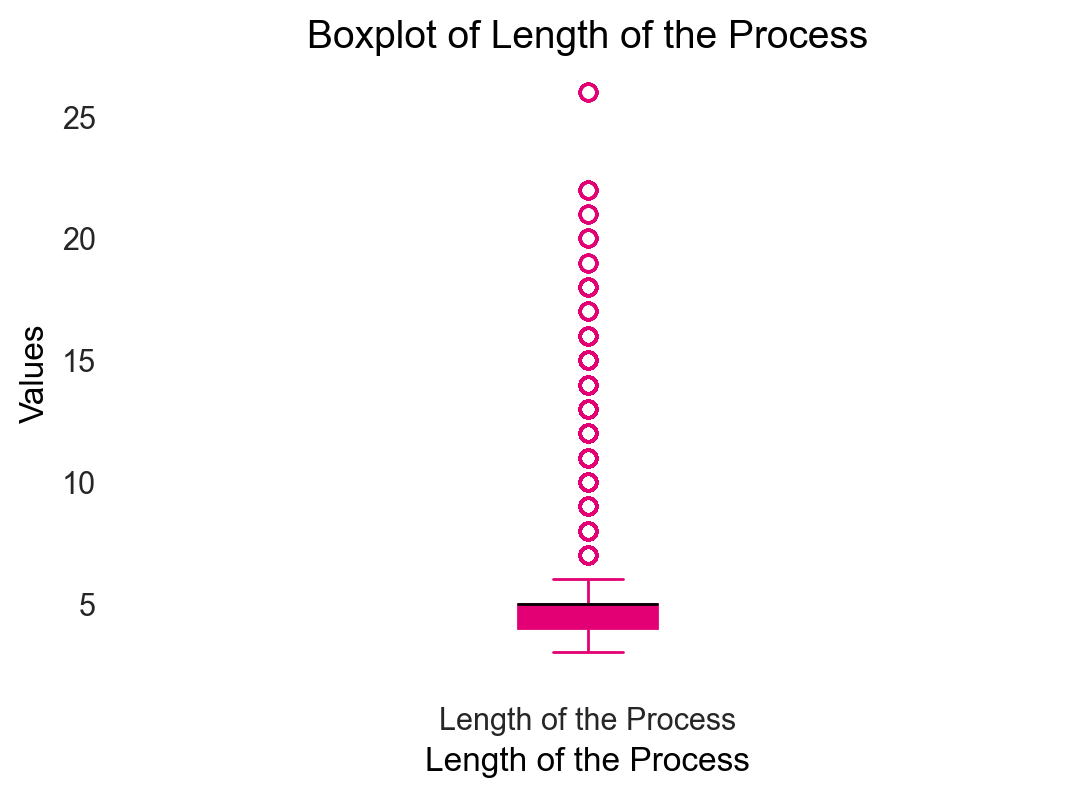

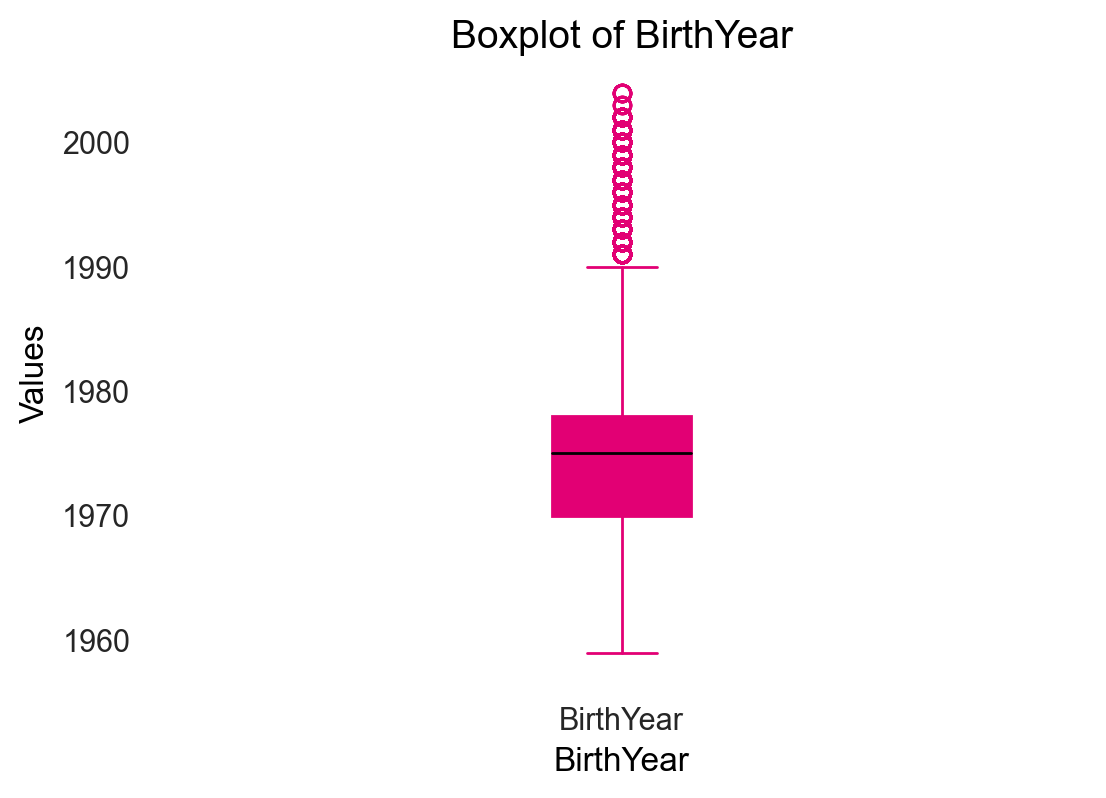

In [262]:
# Define the Millennium BCP color
bcp_magenta = '#E20074'

# Define the columns to plot
columns_to_plot = ['Length of the Process', 'BirthYear']

# Create boxplots for the selected columns separately
for column in columns_to_plot:
    plt.figure(figsize=(6, 4), facecolor='white')
    
    # Customize boxplot
    boxplot = merged_final.boxplot(column=column, patch_artist=True, 
                                   boxprops=dict(facecolor=bcp_magenta, color=bcp_magenta), 
                                   capprops=dict(color=bcp_magenta), 
                                   whiskerprops=dict(color=bcp_magenta), 
                                   flierprops=dict(markeredgecolor=bcp_magenta), 
                                   medianprops=dict(color='black'))  # Keep the median in black for visibility
    
    plt.title(f'Boxplot of {column}', fontsize=14, color='black')
    plt.xlabel(column, fontsize=12, color='black')
    plt.ylabel('Values', fontsize=12, color='black')
    
    plt.grid(False)  # Remove grid
    plt.gca().set_facecolor('white')  # Ensure the background color of the plot area is white
  
    plt.show() #cut processes with lenght higher than 10 steps

In [263]:
# Count the number of values higher than 10 in the 'Length of the Process' column
count_higher_than_10 = (merged_final['Length of the Process'] > 10).sum()

# Calculate the total number of values in the column
total_values = merged_final['Length of the Process'].count()

# Calculate the percentage
percentage_higher_than_10 = (count_higher_than_10 / total_values) * 100

# Display the percentage
print(f"The percentage of values higher than 10 in the 'Length of the Process' column is: {percentage_higher_than_10:.2f}%")

The percentage of values higher than 10 in the 'Length of the Process' column is: 2.03%


In [264]:
#Due to the low % of processes with more than 10 steps we decided to drop them as they are considered outliers

In [265]:
total_values

207652

In [266]:
count_higher_than_10 = (merged_final['Length of the Process'] > 10).sum()
count_higher_than_10

4215

In [267]:
# Count occurrences of each unique request ID
request_id_counts = merged_final['Request Identifier'].value_counts()

# Get request IDs with more than 10 occurrences
request_ids_to_drop = request_id_counts[request_id_counts > 10].index

# Filter out rows with request IDs to drop
merged_final = merged_final[~merged_data['Request Identifier'].isin(request_ids_to_drop)]


In [268]:
max_length = merged_final['Length of the Process'].max()
min_length = merged_final['Length of the Process'].min() #the drop is correct

In [269]:
max_length 

10

In [270]:
min_length 

3

- From the section above we ended up removing the long processes (with more than 10 steps). We consider them as outliers and since they represent a minimal percentage among the data we decided to remove them and drive our resources and focus to more recurrent processes.
- 'Birth years' values correspond to possible cases so we mantained these extreme values


<a class="anchor" id="rob">

## 'Robots' cases in User Infromation
###### [Go back to Contents](#top)
</a>


- As we said before we are going to look back aigain to the data missing in user information.
- We know from Millenium that these are either people that have left the company or robots.
- From now onwards we will treat them as robots and so we will fill all the missing spaces with the information that we considered to be adequate for them.

In [271]:
# Replace "Non identifiable" with "Robot" in the 'Task Executer' column
merged_final['Task Executer'] = merged_final['Task Executer'].replace("Non identifiable", "Robot")

In [272]:
merged_final[merged_final['Task Executer']=="Robot"]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,idBPMRequirement,Target
15,1609274,4,2022-04-21 11:54:32.263,2022-04-26 09:54:32.757,2022-04-26 09:54:32.757,2022-04-26 09:54:32.317,101,Robot,Non identifiable,Requester response to rejection,...,1,0,0,0,0,0,0,0,Non applicable,0
53,1602749,12,2022-04-19 16:02:08.233,2022-04-27 11:02:08.633,2022-04-27 11:02:08.633,2022-04-27 11:02:08.297,107,Robot,Non identifiable,Final task,...,1,0,0,0,0,0,0,0,Non applicable,3
56,1625962,13,2022-04-28 12:02:50.183,2022-05-05 15:16:32.910,2022-05-05 15:19:12.330,2022-04-18 10:24:41.830,102,Robot,1104,Execution,...,0,0,1,0,0,0,0,0,Non applicable,3
60,1836814,13,2022-06-14 11:04:09.720,2022-06-21 15:04:13.713,2022-06-21 15:04:13.713,2022-06-21 15:04:09.877,107,Robot,Non identifiable,Final task,...,0,0,1,0,0,0,0,0,Non applicable,3
79,1803881,17,2022-06-07 08:15:06.323,2022-06-14 12:30:02.690,2022-06-14 12:30:02.690,2022-06-14 12:30:00.073,107,Robot,Non identifiable,Final task,...,2,0,0,0,0,0,0,0,Non applicable,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208964,6626745,45763,2024-04-01 09:22:55.947,2024-04-01 14:45:19.713,2024-04-01 14:45:33.183,2024-04-01 16:22:56.107,104,Robot,529,Execution,...,0,0,1,0,0,0,0,0,Non applicable,3
208965,6631993,45763,2024-04-01 14:45:33.573,2024-04-08 09:45:34.080,2024-04-08 09:45:34.080,2024-04-08 09:45:33.737,107,Robot,Non identifiable,Final task,...,0,0,1,0,0,0,0,0,Non applicable,3
208989,6634616,45767,2024-04-01 17:15:29.120,2024-04-08 12:15:29.427,2024-04-08 12:15:29.430,2024-04-08 12:15:29.170,107,Robot,Non identifiable,Final task,...,1,1,0,0,0,0,0,0,Non applicable,3
208995,6692068,45768,2024-04-09 15:32:39.317,2024-04-16 10:32:40.020,2024-04-16 10:32:40.020,2024-04-16 10:32:39.390,107,Robot,Non identifiable,Final task,...,0,0,0,0,0,0,0,0,Non applicable,3


In [273]:
merged_final['Years in Org Position'].value_counts()

Years in Org Position
1.0     76060
0.0     46573
2.0     22140
3.0     11727
4.0      7182
5.0      7084
6.0      3035
8.0      2884
7.0      2791
12.0      769
10.0      762
11.0      759
9.0       734
15.0      430
14.0      246
13.0      145
20.0      130
19.0       87
16.0       27
23.0       20
18.0        6
17.0        5
Name: count, dtype: int64

In [274]:
# Fill missing values with meaningful values
merged_final['Sex'] = merged_final['Sex'].fillna("No Sex")
merged_final['Role ID'] = merged_final['Role ID'].fillna("0")
merged_final['Is Manager'] = merged_final['Is Manager'].fillna("No")
merged_final['IsOutSourcer'] = merged_final['IsOutSourcer'].fillna("Y")
merged_final['Years in Org Position'] = merged_final['Years in Org Position'].fillna(0)
merged_final['Age'] = merged_final['Age'].fillna(0)

#Some of them were not filled as they will be dropped in the next section

In [275]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203437 entries, 0 to 209016
Data columns (total 52 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               203437 non-null  object        
 1   Request Identifier                    203437 non-null  object        
 2   Task arrival date                     203437 non-null  datetime64[ns]
 3   Task capture date                     203437 non-null  datetime64[ns]
 4   Task execution end date               203437 non-null  datetime64[ns]
 5   Task predicted end date               158403 non-null  datetime64[ns]
 6   Actvity ID                            203437 non-null  object        
 7   Task Executer                         203437 non-null  object        
 8   Task executer department              203437 non-null  object        
 9   Task Type                             203437 non-null  object   


<a class="anchor" id="fdrop">

## Feature Drops
###### [Go back to Contents](#top)
</a>


This section aims to drop the features that were used in the creation of other variables, therefore they are redundant and need to be dropped. 

In [276]:
#Columns to drop
columns_to_drop = ['Task capture date', 'Task execution end date','Task predicted end date', 'OrgUnitSince', 'BirthYear','Length of the Process']

#Drop the specified columns from merged_final
merged_final = merged_final.drop(columns=columns_to_drop)

In [277]:
#Convert columns to integer type (Final treatment)
merged_final['Years in Org Position'] = merged_final['Years in Org Position'].astype(int)
merged_final['Age'] = merged_final['Age'].astype(int)
merged_final['Overdue Days'] = merged_final['Overdue Days'].astype(int)

merged_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 203437 entries, 0 to 209016
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Task Id                               203437 non-null  object        
 1   Request Identifier                    203437 non-null  object        
 2   Task arrival date                     203437 non-null  datetime64[ns]
 3   Actvity ID                            203437 non-null  object        
 4   Task Executer                         203437 non-null  object        
 5   Task executer department              203437 non-null  object        
 6   Task Type                             203437 non-null  object        
 7   Action                                203437 non-null  object        
 8   idBPMApplicationAction                203437 non-null  object        
 9   Period between arrival and execution  203437 non-null  int32    


<a class="anchor" id="desc">

## Final Descriptive Statistics
###### [Go back to Contents](#top)
</a>


In [278]:
merged_final.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Task Id,203437,203437,1584303,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Request Identifier,203437,45021,18344,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task arrival date,203437,NaN,NaN,NaN,2023-04-06 07:55:10.479824128,2022-04-11 16:02:13.820000,2022-10-26 16:27:39.987000064,2023-04-04 10:05:42.670000128,2023-08-31 13:53:22.536999936,2024-05-07 08:31:29.010000,NaN
Actvity ID,203437,9,102,53411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task Executer,203437,1639,10606,32255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task executer department,203437,387,Non identifiable,26928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task Type,203437,4,Execution,130997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action,203437,7,Non identifiable,81326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idBPMApplicationAction,203437,18,270,45024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Period between arrival and execution,203437.0,NaN,NaN,NaN,698.669087,0.0,0.0,1.0,53.0,12629.0,2180.847057


# Conclusions

203437 rows × 46 columns

#### Categorical Variables:
**Task Id**: each task id is unique

**Request Identifier**: there are 45021 unique request identifiers

**Activity ID**: there are 9 different activity ID's the most frequent Activity ID appears 53,411 times (26.26% of records).

**Task Executer and task executer department**: there are 1,639 different values and the most frequent value appears 32,255 times (15.86% of records).

**Task Type**: there are only 4 types of task type. "Execution" appears 130,997 times (64.40% of records).

**Action**: there are 7 different actions. "Non identifiable" appears 81,326 times (39.98% of records). This means that in the beggining it had no action filled for most of the data

**idBPMApplicationAction**: 18 unique different values. The most frequent value appears 45,024 times (22.14% of records).

**Sex**: 3 unique values, and the top value "F" appears in 64.19% of records

**Role ID**: there are 29 unique values. The most frequent Role ID is 5 and it appears in 27.28% of records

**Is Manager**: is a binary variable. 68.25% of records are "Yes" meaning they're done by managers, this means that these are most likely very important processes to have this kind of labor.

**IsOutSourcer**: is a binary variable. "N" appears 68.25% of records. After checking this we can say that this means that when a process is not done by a manager it is an outsources that completes the task

**idBPMRequirement**: 9 unique values and 98.55% are "Non applicable" meaning they were not filled before


#### Date/Time Variables:
**Task arrival date**: Ranges from 2022-04-11 16:02:13.820 to 2024-05-07 08:31:29.010.
   
#### Numeric Variables:

**Period between arrival and execution**:
   - About 50% of tasks are executed almost immediately (median of 1).
   - A significant range up to 12,629 units indicates a wide distribution, with 75% of tasks executed within 53 units.

**Period between arrival and capture**:
   - Half of the tasks are captured immediately (median of 0).
   - The range shows some tasks take significantly longer, up to 12,116 units.

**Cumulative Length of Process**:
   - Most processes are relatively short, with 75% completing in 4 units or less. Althought we cannot forget we're only acessing processes up to 10 steps

**Rejections**:
   - Rejections are rare, with a mean close to zero, indicating that almost all tasks are accepted.

**Overdue Days**:
   - Most tasks are not overdue (75th percentile is 0), but some can be overdue by up to 525 days, showing a highly skewed distribution.

**Years in Org Position**:
   - Most employees have been in their position for a short period, with a median of 1 year and 75% within 2 years.

**Age**:
   - The age distribution is centered around middle-aged employees, with 50% aged between 46 and 53 years. This is as expected in Portuguese labour force. 

**Value Count**:
   - The count of values is mostly around 6-7, indicating a moderate variety in this metric.

#### ID Fields:

**idField_203 to idField_3935**:
   - These fields mostly have means indicating the proportion of records where the field is 1 (present). For example:
     - **idField_203**: Mean 1 (always present).
     - **idField_3390**: Mean 0.818848 (present in ~81.88% of records).
     - **idField_3420**: Mean 0.321928 (present in ~32.19% of records).
   
#### Value Fields:

**Value_10 to Value_100**:
   - These fields have means and standard deviations indicating various levels of presence and variation. For instance:
     - **Value_10**: Mean 1.84407, Std 1.28918, suggesting a moderate presence and variation

.
**Value_80**: Mean 0.0892168, Std 0.290506, suggesting low presence.
   - The skew towards lower means indicates that higher values are less common across these fields.

#### Overall Insights:

- **Task and Request Data**: There is a significant uniqueness in task and request identifiers, but some categories like activity ID and task executer are dominated by a few frequent entries.
- **Task Processing**: The periods between arrival and execution/capture show that while many tasks are handled quickly, a minority experience significant delays.
- **Demographics**: The employee age and years in position suggest a workforce that skews older and however only have 1 to 2 years experience in their roles.
- **ID Fields**: High presence rates in certain binary fields indicate specific common attributes or conditions within the dataset.
- **Value Fields**: Varying means in additional value fields suggest differences in task characteristics or outcomes.



<a class="anchor" id="bas">

## Basket Division
###### [Go back to Contents](#top)
</a>


After processing and transforming the data, we compiled all processed subsets (excluding the last subset) into a list which was then exported to CSV files for loading them in a modelling environment and develop our predicitions. 

In [137]:
# Assuming your dataset has a 'Request Identifier' column to identify each process
process_ids = merged_final['Request Identifier'].unique()

# Create a list to hold the subsets
subsets = [pd.DataFrame(columns=merged_final.columns) for _ in range(10)]

# Iterate over each subset index
for subset_idx in range(1, 11):
    # Cumulative count of rows processed for each process
    cumulative_counts = {process_id: 0 for process_id in process_ids}
    
    # Iterate over each process
    for process_id in process_ids:
        # Get the rows of the current process that haven't been processed yet
        process_data = merged_final[merged_final['Request Identifier'] == process_id].iloc[cumulative_counts[process_id]:-1]
        
        # If subset index exceeds available rows in the current process, move on to the next process
        if subset_idx > len(process_data):
            continue
        
        # Get the number of rows to add from the current process
        num_rows_to_add = min(subset_idx, len(process_data))
        
        # Add the selected rows to the current subset
        subsets[subset_idx - 1] = pd.concat([subsets[subset_idx - 1], process_data.iloc[:num_rows_to_add]], ignore_index=True)
        
        # Update the cumulative count of rows processed for the current process
        cumulative_counts[process_id] += num_rows_to_add

# Print each subset DataFrame
for i, subset in enumerate(subsets):
    print(f'Subset {i+1} complete:')
    print(subset)
    print('\n')

Subset 1 complete:
       Task Id Request Identifier       Task arrival date Actvity ID  \
0      1584303                  1 2022-04-11 16:02:13.820        100   
1      1586253                  2 2022-04-12 10:50:25.570        100   
2      1589605                  4 2022-04-13 08:15:39.620        100   
3      1589669                  5 2022-04-13 08:37:34.943        100   
4      1590084                  6 2022-04-13 09:46:18.410        100   
...        ...                ...                     ...        ...   
45016  6626572              45768 2024-04-01 09:08:13.167        100   
45017  6626639              45769 2024-04-01 09:13:34.370        100   
45018  6627063              45770 2024-04-01 09:45:06.497        100   
45019  6728664              45771 2024-04-15 18:16:21.270        100   
45020  6847219              45772 2024-05-03 15:33:43.773        100   

      Task Executer Task executer department        Task Type  \
0              7638                     7638  Initi

This next pipeline makes an initial treatment to each subset where new variables that are process genereic are created and only the desired activities ids are kept.

In [144]:
# Function to filter the dataset based on Activity ID and count excluding the last row
def process_and_count(dataset):
    # Removing processes that are not currently on Activity 102 or 105 or 100
    last_occurrences = dataset.groupby("Request Identifier").tail(1)
    valid_requests = last_occurrences[last_occurrences["Actvity ID"].isin(["102", "105", "100"])]["Request Identifier"]
    filtered_dataset = dataset[dataset["Request Identifier"].isin(valid_requests)]


    def count_exclude_last(group):
        group = group[:-1]
        num_females = (group['Sex'] == 'F').sum()
        num_managers = (group['Is Manager'] == 'Yes').sum()
        num_outsourcers = (group['IsOutSourcer'] == 'Y').sum()
        num_rejections = group['Rejections'].sum()
        return pd.Series({'NumberOfFemales': num_females,
                          'NumberOfManagers': num_managers,
                          'NumberOfOutsourcers': num_outsourcers,
                          'NumberOfRejections': num_rejections})

    new_vars = filtered_dataset.groupby('Request Identifier').apply(count_exclude_last)
    filtered_dataset = pd.merge(filtered_dataset, new_vars, left_on='Request Identifier', right_index=True)
    filtered_dataset.drop(columns=['Sex', 'Is Manager', 'IsOutSourcer','Rejections', 'Task Id'], inplace=True)
    
    return filtered_dataset

# Function to transform the DataFrame
def transform_dataframe(df):
    exclude_columns = ['Target', 'NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers', 'NumberOfRejections', "Value Count", "idField_203", "idField_3486", "idField_3388", "idField_3391", "idField_3390", "idField_3491", "idField_3420", "idField_3935", "idField_47", "idField_1602", "idField_1604", "Value_10", "Value_50", "Value_30", "Value_70", "Value_20", "Value_100", "Value_60", "Value_2", "Value_40", "Value_1", "Value_80", "Value_90"]
    columns_to_pivot = df.columns[~df.columns.isin(exclude_columns)]
    
    df['step'] = df.groupby('Request Identifier').cumcount() + 1
    df['max_step'] = df.groupby('Request Identifier')['step'].transform('max')
    
    last_step_df = df[df['step'] == df['max_step']]
    last_step_df = last_step_df[['Request Identifier', 'step', 'Actvity ID', 'Task arrival date']]
    
    df_to_pivot = df[df['step'] != df['max_step']]
    pivoted_df = df_to_pivot.pivot(index='Request Identifier', columns='step', values=columns_to_pivot)
    pivoted_df.columns = [f'{col[0]}_act{col[1]}' for col in pivoted_df.columns]
    
    extra_columns = df.groupby('Request Identifier')[exclude_columns].first()
    
    last_step_pivoted_df = last_step_df.pivot(index='Request Identifier', columns='step', values=['Actvity ID', 'Task arrival date']) 
    last_step_pivoted_df.columns = [f'{col[0]}_last_act{col[1]}' for col in last_step_pivoted_df.columns]
    
    pivoted_df = pivoted_df.drop(columns=pivoted_df.columns[pivoted_df.columns.str.startswith('step')], errors='ignore')
    pivoted_df = pivoted_df.drop(columns=pivoted_df.columns[pivoted_df.columns.str.startswith('Request Identifier')], errors='ignore')
    
    last_step_pivoted_df = last_step_pivoted_df.drop(columns=last_step_pivoted_df.columns[last_step_pivoted_df.columns.str.startswith('step')], errors='ignore')
    last_step_pivoted_df = last_step_pivoted_df.drop(columns=last_step_pivoted_df.columns[last_step_pivoted_df.columns.str.startswith('Request Identifier')], errors='ignore')
    
    final_df = pd.concat([pivoted_df, extra_columns, last_step_pivoted_df], axis=1)
    
    return final_df

processed_and_transformed_subsets = []
for i,subset in enumerate(subsets[:-1]):  # Exclude the last subset
    processed_subset = process_and_count(subset)
    transformed_subset = transform_dataframe(processed_subset)
    processed_and_transformed_subsets.append(transformed_subset)
    print(f"Subset {i+1} is finished/treated")

# Print the final processed and transformed subsets
for i, df in enumerate(processed_and_transformed_subsets):
    print(f"Processed and transformed subset {i+1}:\n", df.head())

Subset 1 is finished/treated
Subset 2 is finished/treated
Subset 3 is finished/treated
Subset 4 is finished/treated
Subset 5 is finished/treated
Subset 6 is finished/treated
Subset 7 is finished/treated
Subset 8 is finished/treated
Subset 9 is finished/treated
Processed and transformed subset 1:
                    Target  NumberOfFemales  NumberOfManagers  \
Request Identifier                                             
1                       1                0                 0   
10                      2                0                 0   
100                     2                0                 0   
1000                    2                0                 0   
10000                   1                0                 0   

                    NumberOfOutsourcers  NumberOfRejections Value Count  \
Request Identifier                                                        
1                                     0                   0           9   
10                          

In [189]:
# Export all DataFrames in processed_and_transformed_subsets to CSV
for i, subset in enumerate(processed_and_transformed_subsets):
    filename = f'processed_and_transformed_subset_{i+1}.csv'
    subset.to_csv(filename, index=False)

The next phase of the project is developed in each of the other notebooks.